In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch . nn as nn
import torch . optim as optim
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
Train_data = pd.read_csv('train_Int_MM_PCA25.csv')
Validation_data = pd.read_csv('valid_Int_MM_PCA25.csv')
Test_data = pd.read_csv('test_Int_MM_PCA25.csv')
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PC1           12000 non-null  float64
 1   PC2           12000 non-null  float64
 2   PC3           12000 non-null  float64
 3   PC4           12000 non-null  float64
 4   PC5           12000 non-null  float64
 5   PC6           12000 non-null  float64
 6   PC7           12000 non-null  float64
 7   PC8           12000 non-null  float64
 8   PC9           12000 non-null  float64
 9   PC10          12000 non-null  float64
 10  PC11          12000 non-null  float64
 11  PC12          12000 non-null  float64
 12  PC13          12000 non-null  float64
 13  PC14          12000 non-null  float64
 14  PC15          12000 non-null  float64
 15  PC16          12000 non-null  float64
 16  PC17          12000 non-null  float64
 17  PC18          12000 non-null  float64
 18  PC19          12000 non-nu

In [3]:
Train_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,LoanApproved,RiskScore
0,-0.412651,0.084086,0.282528,-0.393400,-0.096727,0.393623,-0.103533,0.098367,-0.313214,-0.013962,...,-0.091701,-0.072858,-0.079062,-0.137487,-0.000524,-0.022516,-0.060531,0.068837,0,0.402174
1,-0.177765,0.031687,0.220899,0.010585,-0.042097,-0.534274,0.271388,0.394490,-0.065320,0.194361,...,-0.071684,-0.103167,-0.103785,0.153628,-0.085276,0.018408,-0.131777,-0.021270,0,0.384058
2,0.075380,-0.140120,-0.233582,0.085041,-0.253663,-0.209136,-0.191891,0.494238,-0.013998,-0.162744,...,-0.103463,-0.177111,-0.164072,-0.008256,0.023895,-0.006031,-0.057943,-0.023823,0,0.438406
3,0.598926,-0.203006,0.054247,-0.085631,0.062238,0.238745,-0.549751,-0.151796,0.010523,0.218145,...,-0.038672,-0.111568,-0.236795,0.071849,0.005840,-0.009029,0.019584,0.092046,1,0.086957
4,0.089788,-0.029256,0.082212,-0.036527,-0.274680,-0.538655,-0.136887,-0.148626,0.186360,-0.124184,...,0.066475,-0.141779,0.117764,0.076732,0.013866,-0.036232,-0.002700,0.038166,0,0.438406


In [4]:
X_training = Train_data.drop('LoanApproved',axis=1)
X_training = X_training.drop('RiskScore',axis=1)
y_training = Train_data['LoanApproved']

In [5]:
y_training.min()

0

In [6]:
X_validation = Validation_data.drop('LoanApproved',axis=1)
X_validation = X_validation.drop('RiskScore',axis=1)
y_validation = Validation_data['LoanApproved']

In [7]:
X_testing = Test_data.drop('LoanApproved',axis=1)
X_testing = X_testing.drop('RiskScore',axis=1)
y_testing = Test_data['LoanApproved']

In [8]:
class SingleLayer(nn.Module):
    def __init__(self, input_size, hidden1):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

In [9]:
X_training = X_training.values
y_training = y_training.values
X_validation = X_validation.values
y_validation = y_validation.values
X_testing = X_testing.values
y_testing = y_testing.values

In [10]:
print(y_training)

[0 0 0 ... 1 0 0]


In [11]:
X_train, y_train = torch.tensor(X_training, dtype=torch.float32), torch.tensor(y_training, dtype=torch.float32).view(-1, 1)
X_val, y_val = torch.tensor(X_validation, dtype=torch.float32), torch.tensor(y_validation, dtype=torch.float32).view(-1, 1)
X_test, y_test = torch.tensor(X_testing, dtype=torch.float32), torch.tensor(y_testing, dtype=torch.float32).view(-1, 1)

In [12]:
print(X_training.shape)

(12000, 25)


Training Losses are 
          0
0  0.706841
1  0.705382
2  0.703929
3  0.702482
4  0.701042
Validation Data
Confusion Matrix for hidden layer 8
[[3044    0]
 [ 935   21]]
Accuracy: 0.7662, Precision: 1.0000, Recall: 0.0220, F1-score: 0.0430

Test Data
Confusion Matrix for hiden layer 8
[[3044    0]
 [ 938   18]]
Accuracy: 0.7655, Precision: 1.0000, Recall: 0.0188, F1-score: 0.0370



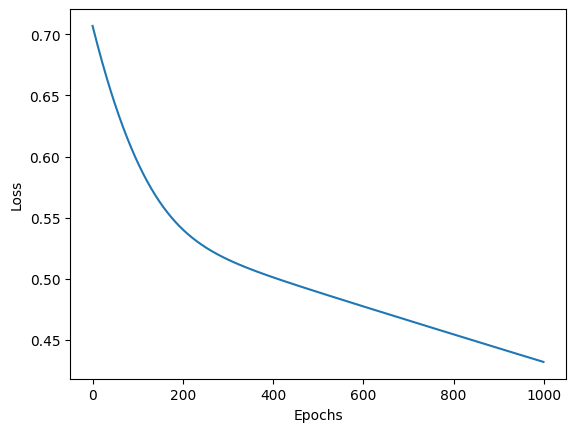

Training Losses are 
          0
0  0.823036
1  0.819529
2  0.816046
3  0.812587
4  0.809152
Validation Data
Confusion Matrix for hidden layer 16
[[3035    9]
 [ 751  205]]
Accuracy: 0.8100, Precision: 0.9579, Recall: 0.2144, F1-score: 0.3504

Test Data
Confusion Matrix for hiden layer 16
[[3030   14]
 [ 746  210]]
Accuracy: 0.8100, Precision: 0.9375, Recall: 0.2197, F1-score: 0.3559



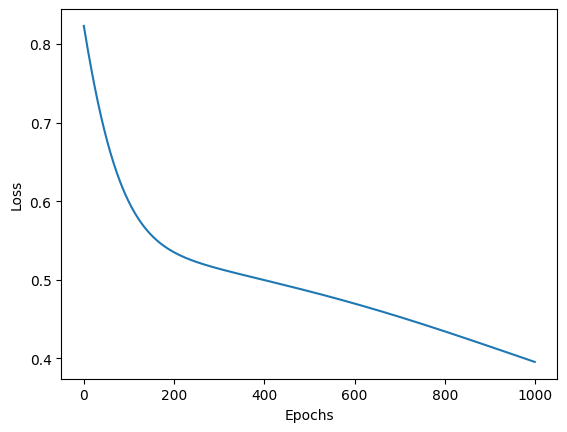

Training Losses are 
          0
0  0.658465
1  0.654324
2  0.650263
3  0.646286
4  0.642392
Validation Data
Confusion Matrix for hidden layer 32
[[3008   36]
 [ 385  571]]
Accuracy: 0.8948, Precision: 0.9407, Recall: 0.5973, F1-score: 0.7306

Test Data
Confusion Matrix for hiden layer 32
[[3005   39]
 [ 359  597]]
Accuracy: 0.9005, Precision: 0.9387, Recall: 0.6245, F1-score: 0.7500



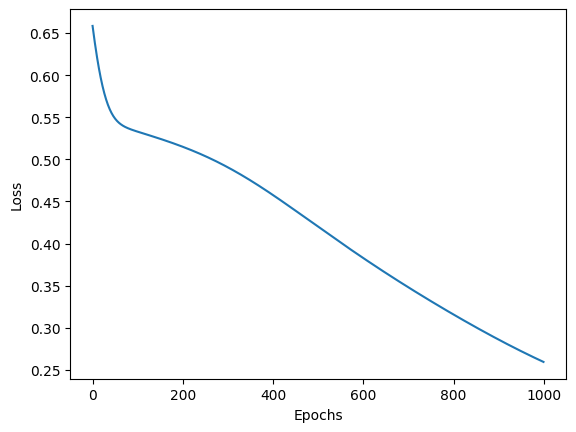

Training Losses are 
          0
0  0.743305
1  0.732787
2  0.722568
3  0.712653
4  0.703046
Validation Data
Confusion Matrix for hidden layer 64
[[3009   35]
 [ 274  682]]
Accuracy: 0.9227, Precision: 0.9512, Recall: 0.7134, F1-score: 0.8153

Test Data
Confusion Matrix for hiden layer 64
[[3007   37]
 [ 288  668]]
Accuracy: 0.9187, Precision: 0.9475, Recall: 0.6987, F1-score: 0.8043



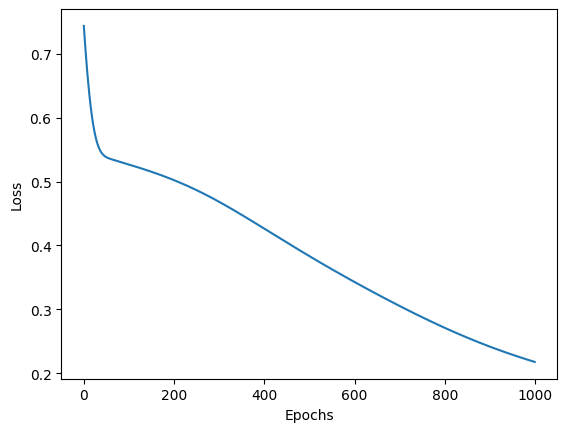

Training Losses are 
          0
0  0.704569
1  0.686881
2  0.670315
3  0.654884
4  0.640595
Validation Data
Confusion Matrix for hidden layer 128
[[3000   44]
 [ 180  776]]
Accuracy: 0.9440, Precision: 0.9463, Recall: 0.8117, F1-score: 0.8739

Test Data
Confusion Matrix for hiden layer 128
[[2987   57]
 [ 177  779]]
Accuracy: 0.9415, Precision: 0.9318, Recall: 0.8149, F1-score: 0.8694



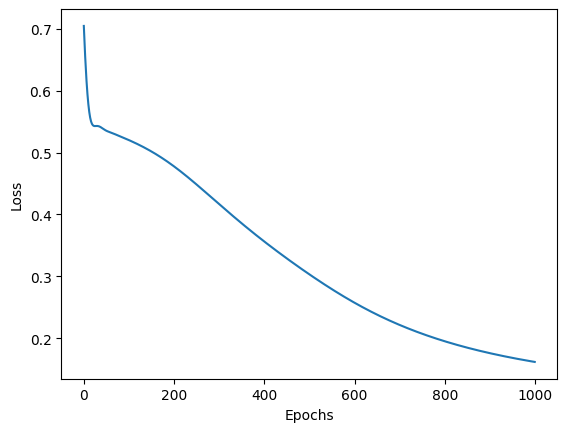

Best accuracy for test data is 0.9415 for degree 128


In [13]:
nuerons = [8,16,32,64,128]
min_loss_2 = 0
best_degree_2 = 1000
for nueron in nuerons:
  model = SingleLayer(25,nueron)
  criterion = nn.BCELoss() #Binary Classifiaction Loss
  optimizer = optim.Adam(model.parameters(), lr=0.001)
  epochs=1000
  loss_arr=[]
  for i in range(epochs):
        optimizer.zero_grad()
        model.train()
        outputs=model(X_train)
        outputs = outputs.view(-1, 1)
        loss = criterion(outputs, y_train.float())
        loss_arr.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
  print("Training Losses are ")
  loss_df = pd.DataFrame(loss_arr)
  print(loss_df.head())
  y_val_pred=model(X_val)
  y_val_pred=(y_val_pred>0.5).float()
  cm = confusion_matrix(y_val, y_val_pred)
  acc = accuracy_score(y_val, y_val_pred)
  precision = precision_score(y_val.numpy(), y_val_pred.numpy())
  recall = recall_score(y_val.numpy(), y_val_pred.numpy())
  f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
  print("Validation Data")
  print(f"Confusion Matrix for hidden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  y_test_pred=model(X_test)
  y_test_pred=(y_test_pred>0.5).float()
  cm = confusion_matrix(y_test, y_test_pred)
  acc = accuracy_score(y_test, y_test_pred)
  if acc > min_loss_2:
    min_loss_2 = acc
    best_degree_2 = nueron
  precision = precision_score(y_test.numpy(), y_test_pred.numpy())
  recall = recall_score(y_test.numpy(), y_test_pred.numpy())
  f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
  print("Test Data")
  print(f"Confusion Matrix for hiden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  plt.plot(range(epochs), loss_arr)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()
print(f"Best accuracy for test data is {min_loss_2} for degree {best_degree_2}")
  #HARDWARE PROBELM MIGHT WORK BETTER WITH A GOOD HARDWARE

In [14]:
class DoubleLayer(nn.Module):
    def __init__(self, input_size, hidden1, hidden2):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

Training Losses are 
          0
0  0.896072
1  0.893305
2  0.890550
3  0.887808
4  0.885080
Validation Data
Confusion Matrix for hidden layer 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


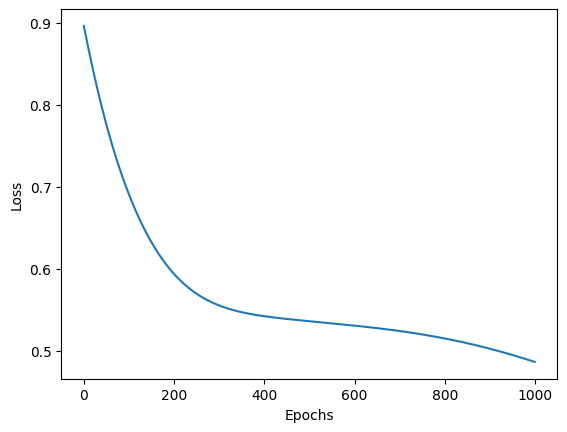

Training Losses are 
          0
0  0.703786
1  0.700534
2  0.697320
3  0.694144
4  0.691009
Validation Data
Confusion Matrix for hidden layer 8 and 16
[[3005   39]
 [ 493  463]]
Accuracy: 0.8670, Precision: 0.9223, Recall: 0.4843, F1-score: 0.6351

Test Data
Confusion Matrix for hiden layer 8 and 16
[[3002   42]
 [ 493  463]]
Accuracy: 0.8662, Precision: 0.9168, Recall: 0.4843, F1-score: 0.6338



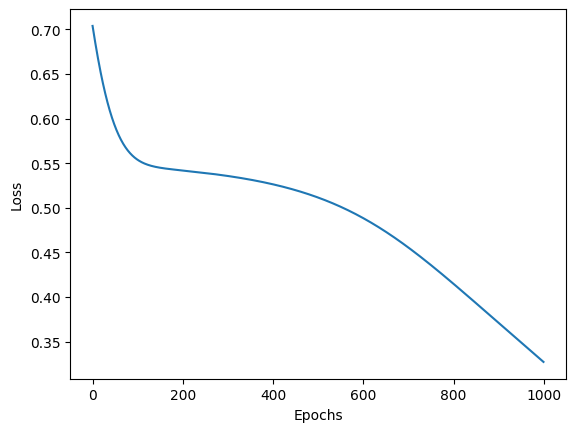

Training Losses are 
          0
0  0.747849
1  0.741638
2  0.735531
3  0.729531
4  0.723641
Validation Data
Confusion Matrix for hidden layer 8 and 32
[[3006   38]
 [ 501  455]]
Accuracy: 0.8652, Precision: 0.9229, Recall: 0.4759, F1-score: 0.6280

Test Data
Confusion Matrix for hiden layer 8 and 32
[[3003   41]
 [ 503  453]]
Accuracy: 0.8640, Precision: 0.9170, Recall: 0.4738, F1-score: 0.6248



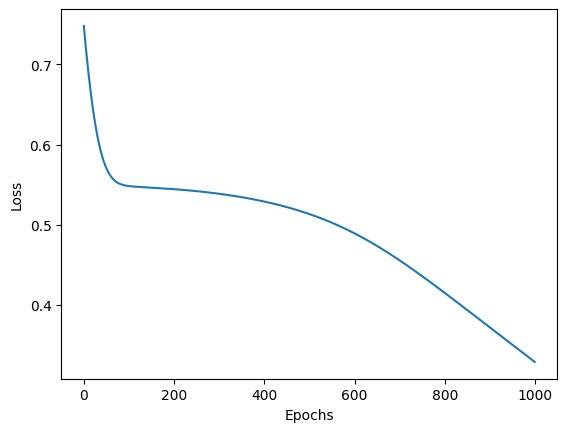

Training Losses are 
          0
0  0.680276
1  0.671355
2  0.662778
3  0.654548
4  0.646670
Validation Data
Confusion Matrix for hidden layer 8 and 64
[[2996   48]
 [ 174  782]]
Accuracy: 0.9445, Precision: 0.9422, Recall: 0.8180, F1-score: 0.8757

Test Data
Confusion Matrix for hiden layer 8 and 64
[[2980   64]
 [ 170  786]]
Accuracy: 0.9415, Precision: 0.9247, Recall: 0.8222, F1-score: 0.8704



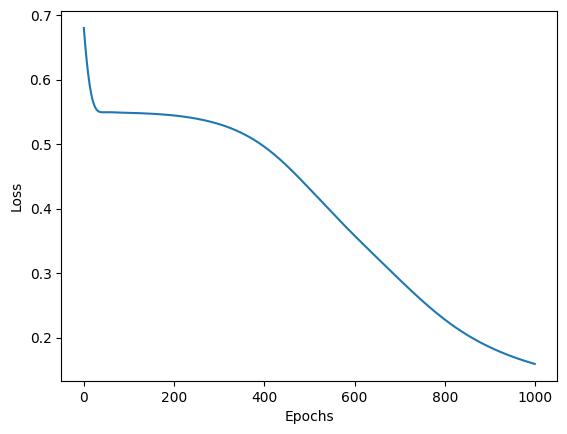

Training Losses are 
          0
0  0.585942
1  0.584912
2  0.583897
3  0.582897
4  0.581913
Validation Data
Confusion Matrix for hidden layer 16 and 8
[[3013   31]
 [ 254  702]]
Accuracy: 0.9287, Precision: 0.9577, Recall: 0.7343, F1-score: 0.8313

Test Data
Confusion Matrix for hiden layer 16 and 8
[[3009   35]
 [ 262  694]]
Accuracy: 0.9257, Precision: 0.9520, Recall: 0.7259, F1-score: 0.8237



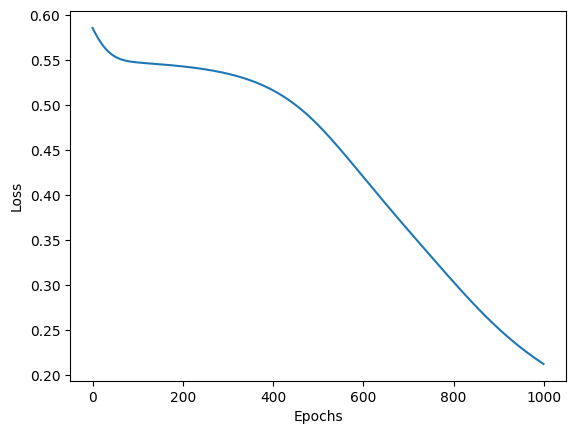

Training Losses are 
          0
0  0.796826
1  0.792548
2  0.788315
3  0.784127
4  0.779986
Validation Data
Confusion Matrix for hidden layer 16 and 16
[[3027   17]
 [ 672  284]]
Accuracy: 0.8277, Precision: 0.9435, Recall: 0.2971, F1-score: 0.4519

Test Data
Confusion Matrix for hiden layer 16 and 16
[[3022   22]
 [ 676  280]]
Accuracy: 0.8255, Precision: 0.9272, Recall: 0.2929, F1-score: 0.4452



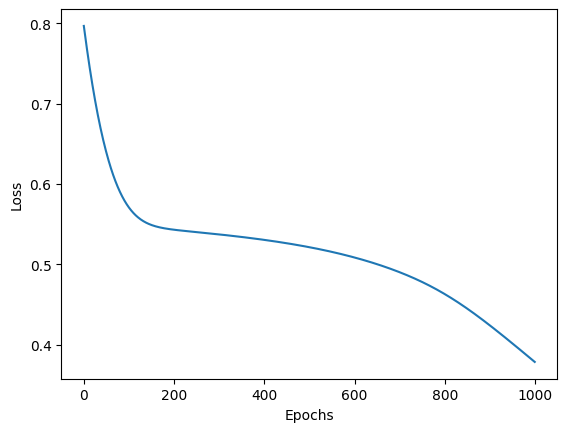

Training Losses are 
          0
0  0.608492
1  0.604740
2  0.601121
3  0.597635
4  0.594285
Validation Data
Confusion Matrix for hidden layer 16 and 32
[[2985   59]
 [ 148  808]]
Accuracy: 0.9483, Precision: 0.9319, Recall: 0.8452, F1-score: 0.8865

Test Data
Confusion Matrix for hiden layer 16 and 32
[[2969   75]
 [ 136  820]]
Accuracy: 0.9473, Precision: 0.9162, Recall: 0.8577, F1-score: 0.8860



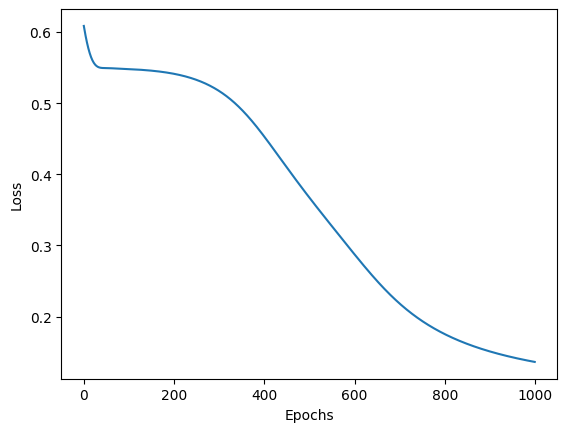

Training Losses are 
          0
0  0.744177
1  0.731497
2  0.719275
3  0.707519
4  0.696235
Validation Data
Confusion Matrix for hidden layer 16 and 64
[[2987   57]
 [ 155  801]]
Accuracy: 0.9470, Precision: 0.9336, Recall: 0.8379, F1-score: 0.8831

Test Data
Confusion Matrix for hiden layer 16 and 64
[[2969   75]
 [ 143  813]]
Accuracy: 0.9455, Precision: 0.9155, Recall: 0.8504, F1-score: 0.8818



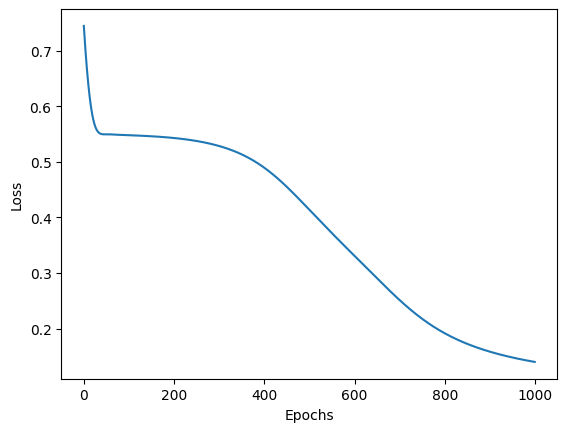

Training Losses are 
          0
0  0.827484
1  0.822984
2  0.818534
3  0.814135
4  0.809788
Validation Data
Confusion Matrix for hidden layer 32 and 8
[[3019   25]
 [ 635  321]]
Accuracy: 0.8350, Precision: 0.9277, Recall: 0.3358, F1-score: 0.4931

Test Data
Confusion Matrix for hiden layer 32 and 8
[[3015   29]
 [ 657  299]]
Accuracy: 0.8285, Precision: 0.9116, Recall: 0.3128, F1-score: 0.4657



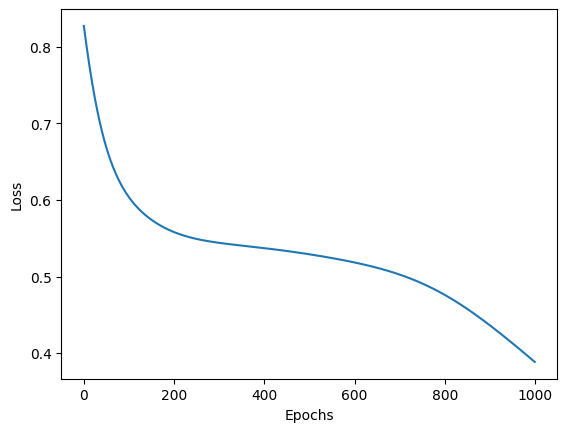

Training Losses are 
          0
0  0.796350
1  0.790484
2  0.784705
3  0.779013
4  0.773411
Validation Data
Confusion Matrix for hidden layer 32 and 16
[[2990   54]
 [ 408  548]]
Accuracy: 0.8845, Precision: 0.9103, Recall: 0.5732, F1-score: 0.7035

Test Data
Confusion Matrix for hiden layer 32 and 16
[[2993   51]
 [ 398  558]]
Accuracy: 0.8878, Precision: 0.9163, Recall: 0.5837, F1-score: 0.7131



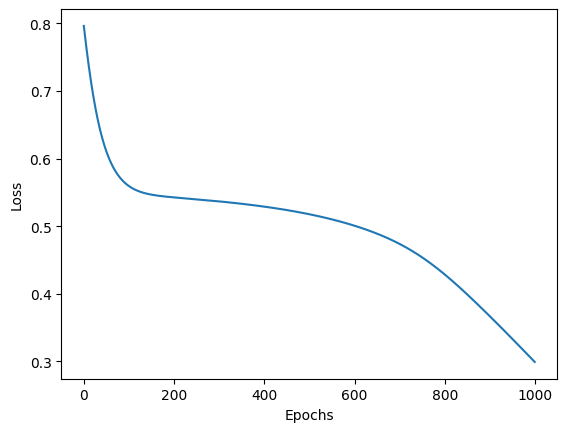

Training Losses are 
          0
0  0.628250
1  0.622936
2  0.617813
3  0.612884
4  0.608154
Validation Data
Confusion Matrix for hidden layer 32 and 32
[[2972   72]
 [ 131  825]]
Accuracy: 0.9493, Precision: 0.9197, Recall: 0.8630, F1-score: 0.8904

Test Data
Confusion Matrix for hiden layer 32 and 32
[[2959   85]
 [ 120  836]]
Accuracy: 0.9487, Precision: 0.9077, Recall: 0.8745, F1-score: 0.8908



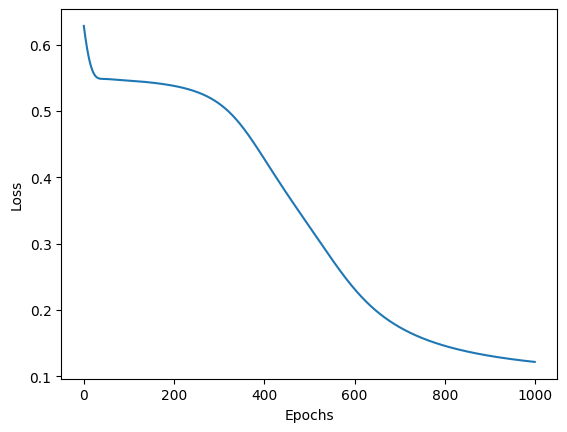

Training Losses are 
          0
0  0.591044
1  0.584527
2  0.578605
3  0.573278
4  0.568543
Validation Data
Confusion Matrix for hidden layer 32 and 64
[[2964   80]
 [ 123  833]]
Accuracy: 0.9493, Precision: 0.9124, Recall: 0.8713, F1-score: 0.8914

Test Data
Confusion Matrix for hiden layer 32 and 64
[[2957   87]
 [ 106  850]]
Accuracy: 0.9517, Precision: 0.9072, Recall: 0.8891, F1-score: 0.8980



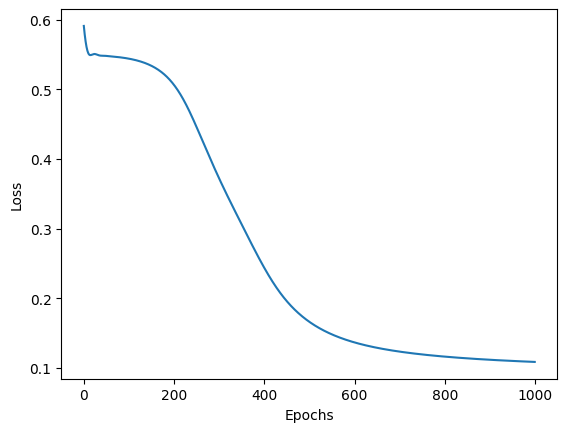

Training Losses are 
          0
0  0.644663
1  0.640843
2  0.637105
3  0.633450
4  0.629883
Validation Data
Confusion Matrix for hidden layer 64 and 8
[[2986   58]
 [ 153  803]]
Accuracy: 0.9473, Precision: 0.9326, Recall: 0.8400, F1-score: 0.8839

Test Data
Confusion Matrix for hiden layer 64 and 8
[[2967   77]
 [ 134  822]]
Accuracy: 0.9473, Precision: 0.9143, Recall: 0.8598, F1-score: 0.8863



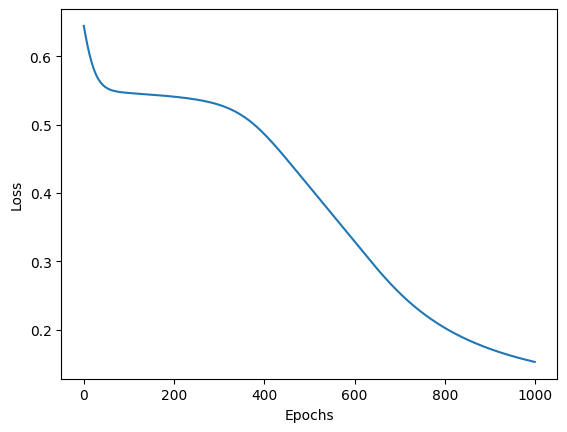

Training Losses are 
          0
0  0.746066
1  0.737836
2  0.729808
3  0.721988
4  0.714379
Validation Data
Confusion Matrix for hidden layer 64 and 16
[[2985   59]
 [ 154  802]]
Accuracy: 0.9467, Precision: 0.9315, Recall: 0.8389, F1-score: 0.8828

Test Data
Confusion Matrix for hiden layer 64 and 16
[[2969   75]
 [ 142  814]]
Accuracy: 0.9457, Precision: 0.9156, Recall: 0.8515, F1-score: 0.8824



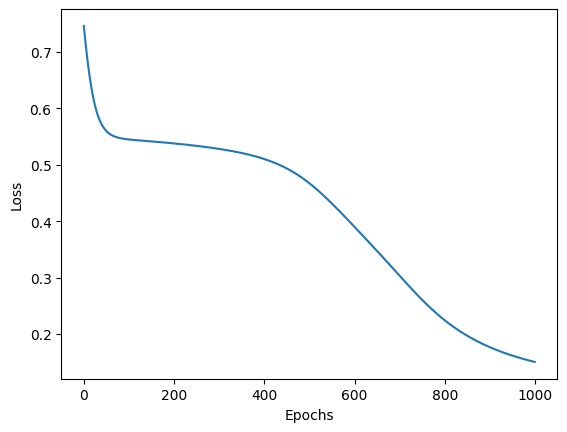

Training Losses are 
          0
0  0.663893
1  0.654836
2  0.646183
3  0.637942
4  0.630118
Validation Data
Confusion Matrix for hidden layer 64 and 32
[[2967   77]
 [ 123  833]]
Accuracy: 0.9500, Precision: 0.9154, Recall: 0.8713, F1-score: 0.8928

Test Data
Confusion Matrix for hiden layer 64 and 32
[[2960   84]
 [ 104  852]]
Accuracy: 0.9530, Precision: 0.9103, Recall: 0.8912, F1-score: 0.9006



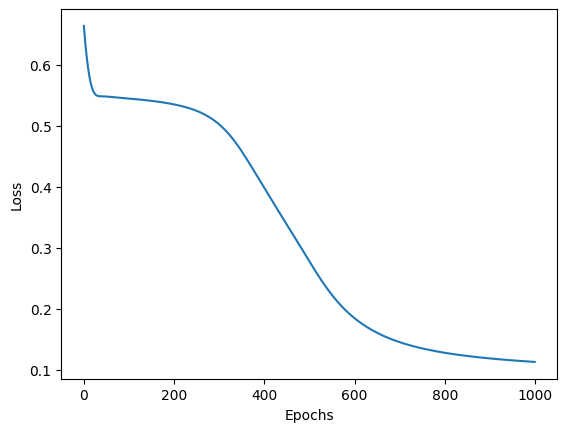

Training Losses are 
          0
0  0.790570
1  0.767750
2  0.746147
3  0.725782
4  0.706675
Validation Data
Confusion Matrix for hidden layer 64 and 64
[[2968   76]
 [ 124  832]]
Accuracy: 0.9500, Precision: 0.9163, Recall: 0.8703, F1-score: 0.8927

Test Data
Confusion Matrix for hiden layer 64 and 64
[[2960   84]
 [ 108  848]]
Accuracy: 0.9520, Precision: 0.9099, Recall: 0.8870, F1-score: 0.8983



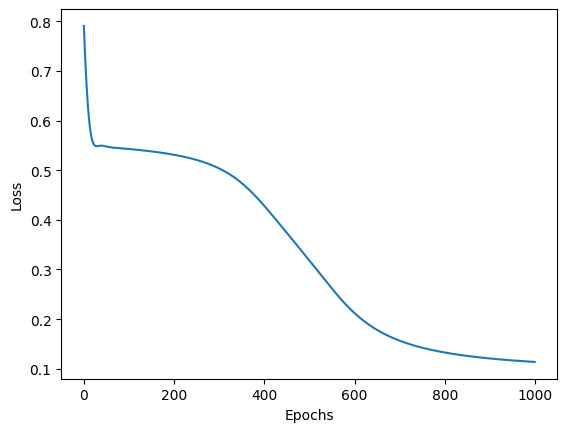

Best accuracy for test data is 0.953 for degree 64 & 32


In [15]:
nuerons = [8,16,32,64]
best_degree_3=0
best_accuracy_2=0
layer_abc=0
for nueron in nuerons:
  for double_nueron in nuerons:
    model = DoubleLayer(25,nueron,double_nueron)
    criterion = nn.BCELoss() #Binary Classifiaction Loss
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    epochs=1000
    loss_arr=[]
    for i in range(epochs):
          optimizer.zero_grad()
          model.train()
          outputs=model(X_train)
          outputs = outputs.view(-1, 1)
          loss = criterion(outputs, y_train.float())
          loss_arr.append(loss.detach().numpy())
          loss.backward()
          optimizer.step()
    print("Training Losses are ")
    loss_df = pd.DataFrame(loss_arr)
    print(loss_df.head())
    y_val_pred=model(X_val)
    y_val_pred=(y_val_pred>0.5).float()
    cm = confusion_matrix(y_val, y_val_pred)
    acc = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val.numpy(), y_val_pred.numpy())
    recall = recall_score(y_val.numpy(), y_val_pred.numpy())
    f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
    print("Validation Data")
    print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    y_test_pred=model(X_test)
    y_test_pred=(y_test_pred>0.5).float()
    cm = confusion_matrix(y_test, y_test_pred)
    acc = accuracy_score(y_test, y_test_pred)
    if acc > best_accuracy_2:
          best_accuracy_2=acc
          best_degree_4=nueron
          layer_abc = double_nueron
    precision = precision_score(y_test.numpy(), y_test_pred.numpy())
    recall = recall_score(y_test.numpy(), y_test_pred.numpy())
    f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
    print("Test Data")
    print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    plt.plot(range(epochs), loss_arr)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
print(f"Best accuracy for test data is {best_accuracy_2} for degree {best_degree_4} & {layer_abc}")

In [16]:
class TripleLayer(nn.Module):
    def __init__(self, input_size, hidden1, hidden2,hidden3):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, hidden3),
        nn.Sigmoid(),
        nn.Linear(hidden3, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

Training Losses are 
          0
0  0.680000
1  0.678468
2  0.676947
3  0.675437
4  0.673936
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


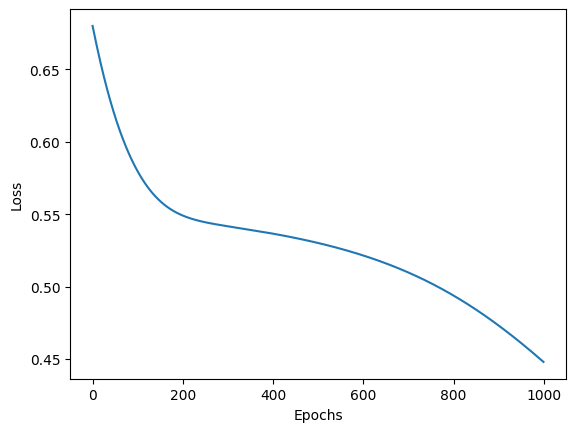

Training Losses are 
          0
0  0.620217
1  0.619031
2  0.617856
3  0.616691
4  0.615535
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 16
[[3024   20]
 [ 574  382]]
Accuracy: 0.8515, Precision: 0.9502, Recall: 0.3996, F1-score: 0.5626

Test Data
Confusion Matrix for hiden layer 8 and 8 and 16
[[3020   24]
 [ 576  380]]
Accuracy: 0.8500, Precision: 0.9406, Recall: 0.3975, F1-score: 0.5588



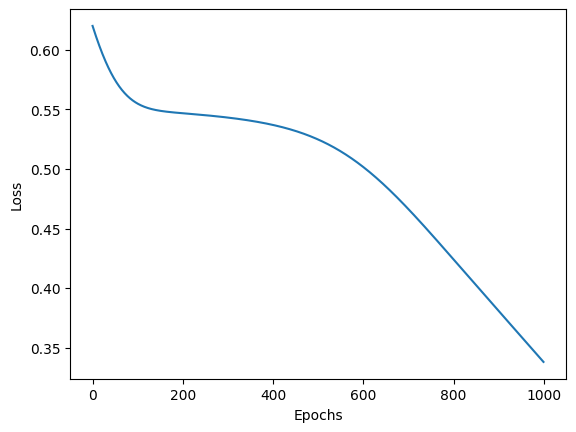

Training Losses are 
          0
0  0.747742
1  0.745786
2  0.743845
3  0.741919
4  0.740008
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


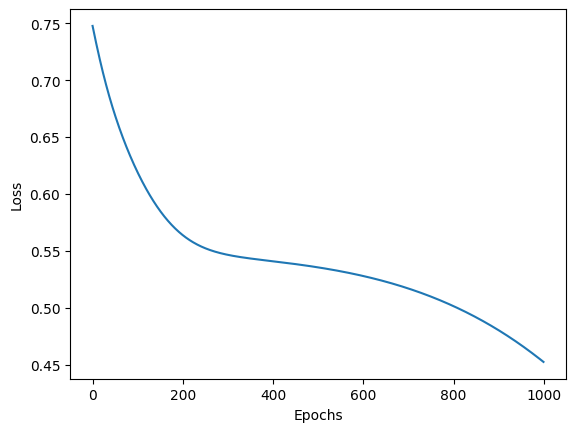

Training Losses are 
          0
0  0.725509
1  0.723597
2  0.721697
3  0.719810
4  0.717936
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 64
[[3044    0]
 [ 927   29]]
Accuracy: 0.7682, Precision: 1.0000, Recall: 0.0303, F1-score: 0.0589

Test Data
Confusion Matrix for hiden layer 8 and 8 and 64
[[3044    0]
 [ 923   33]]
Accuracy: 0.7692, Precision: 1.0000, Recall: 0.0345, F1-score: 0.0667



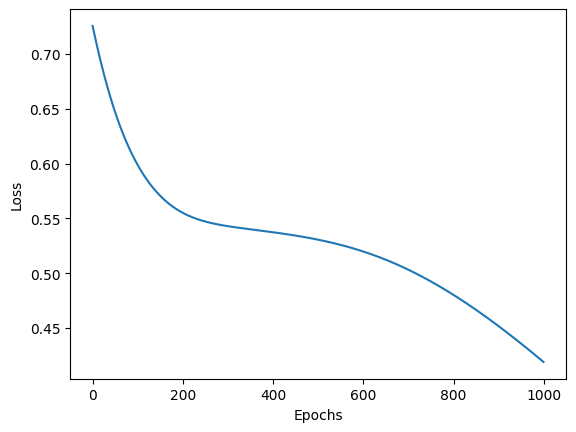

Training Losses are 
          0
0  0.703845
1  0.700878
2  0.697942
3  0.695037
4  0.692164
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 8
[[3000   44]
 [ 482  474]]
Accuracy: 0.8685, Precision: 0.9151, Recall: 0.4958, F1-score: 0.6431

Test Data
Confusion Matrix for hiden layer 8 and 16 and 8
[[3001   43]
 [ 478  478]]
Accuracy: 0.8698, Precision: 0.9175, Recall: 0.5000, F1-score: 0.6473



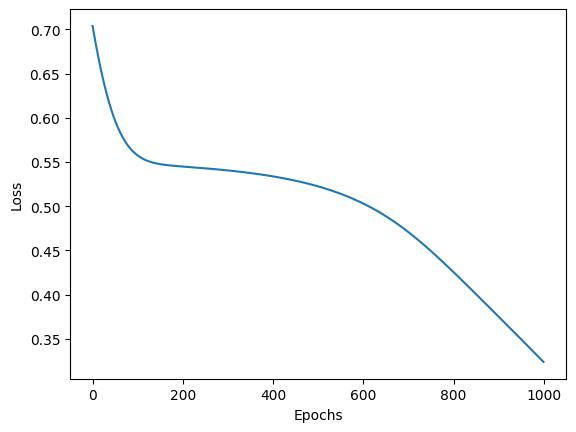

Training Losses are 
          0
0  0.706166
1  0.703015
2  0.699899
3  0.696817
4  0.693770
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 16
[[3014   30]
 [ 594  362]]
Accuracy: 0.8440, Precision: 0.9235, Recall: 0.3787, F1-score: 0.5371

Test Data
Confusion Matrix for hiden layer 8 and 16 and 16
[[3013   31]
 [ 602  354]]
Accuracy: 0.8417, Precision: 0.9195, Recall: 0.3703, F1-score: 0.5280



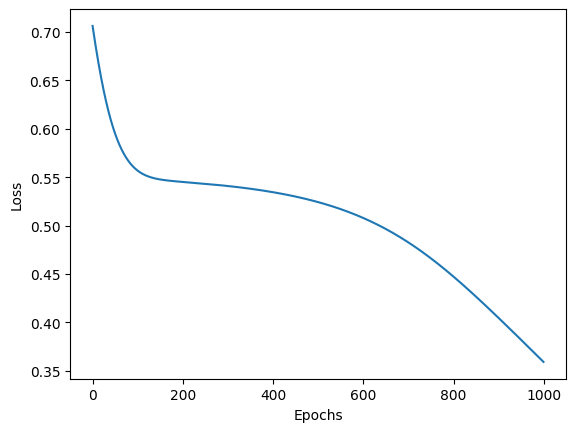

Training Losses are 
          0
0  0.776132
1  0.772464
2  0.768833
3  0.765238
4  0.761681
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 32
[[3032   12]
 [ 732  224]]
Accuracy: 0.8140, Precision: 0.9492, Recall: 0.2343, F1-score: 0.3758

Test Data
Confusion Matrix for hiden layer 8 and 16 and 32
[[3028   16]
 [ 733  223]]
Accuracy: 0.8127, Precision: 0.9331, Recall: 0.2333, F1-score: 0.3732



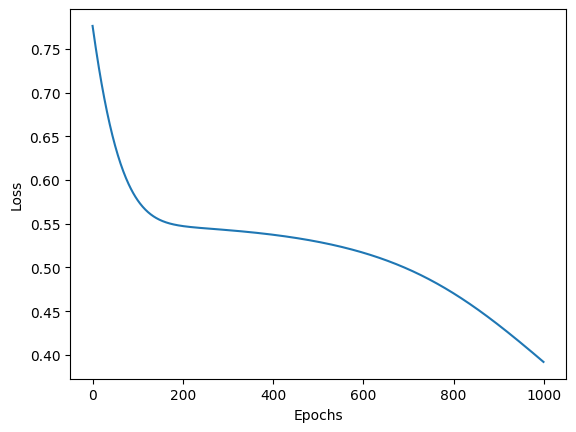

Training Losses are 
          0
0  0.621824
1  0.619697
2  0.617606
3  0.615550
4  0.613530
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 64
[[3010   34]
 [ 411  545]]
Accuracy: 0.8888, Precision: 0.9413, Recall: 0.5701, F1-score: 0.7101

Test Data
Confusion Matrix for hiden layer 8 and 16 and 64
[[3007   37]
 [ 397  559]]
Accuracy: 0.8915, Precision: 0.9379, Recall: 0.5847, F1-score: 0.7204



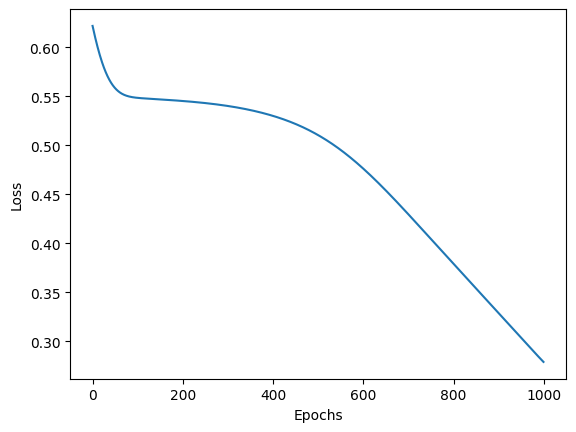

Training Losses are 
          0
0  0.686966
1  0.681690
2  0.676529
3  0.671483
4  0.666553
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 8
[[3003   41]
 [ 298  658]]
Accuracy: 0.9153, Precision: 0.9413, Recall: 0.6883, F1-score: 0.7952

Test Data
Confusion Matrix for hiden layer 8 and 32 and 8
[[3001   43]
 [ 298  658]]
Accuracy: 0.9147, Precision: 0.9387, Recall: 0.6883, F1-score: 0.7942



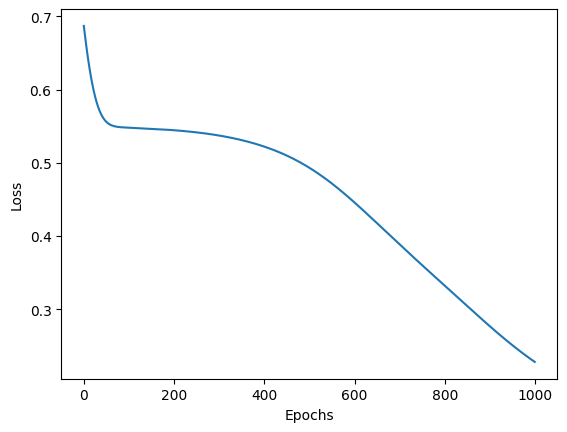

Training Losses are 
          0
0  0.783221
1  0.776498
2  0.769883
3  0.763376
4  0.756981
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 16
[[2995   49]
 [ 421  535]]
Accuracy: 0.8825, Precision: 0.9161, Recall: 0.5596, F1-score: 0.6948

Test Data
Confusion Matrix for hiden layer 8 and 32 and 16
[[2999   45]
 [ 419  537]]
Accuracy: 0.8840, Precision: 0.9227, Recall: 0.5617, F1-score: 0.6983



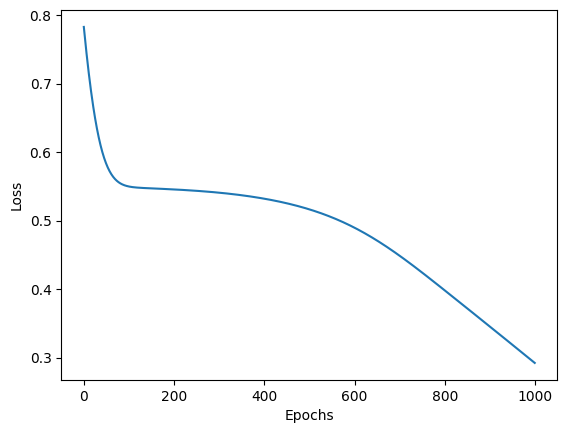

Training Losses are 
          0
0  0.689868
1  0.684682
2  0.679602
3  0.674629
4  0.669765
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 32
[[2997   47]
 [ 418  538]]
Accuracy: 0.8838, Precision: 0.9197, Recall: 0.5628, F1-score: 0.6982

Test Data
Confusion Matrix for hiden layer 8 and 32 and 32
[[3001   43]
 [ 414  542]]
Accuracy: 0.8858, Precision: 0.9265, Recall: 0.5669, F1-score: 0.7034



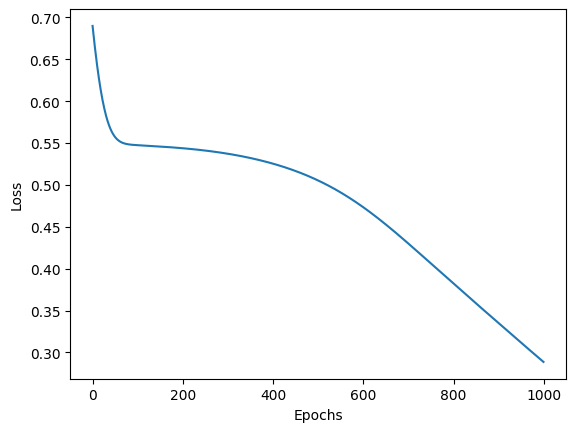

Training Losses are 
          0
0  0.691162
1  0.685926
2  0.680798
3  0.675778
4  0.670867
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 64
[[2995   49]
 [ 431  525]]
Accuracy: 0.8800, Precision: 0.9146, Recall: 0.5492, F1-score: 0.6863

Test Data
Confusion Matrix for hiden layer 8 and 32 and 64
[[2999   45]
 [ 426  530]]
Accuracy: 0.8822, Precision: 0.9217, Recall: 0.5544, F1-score: 0.6924



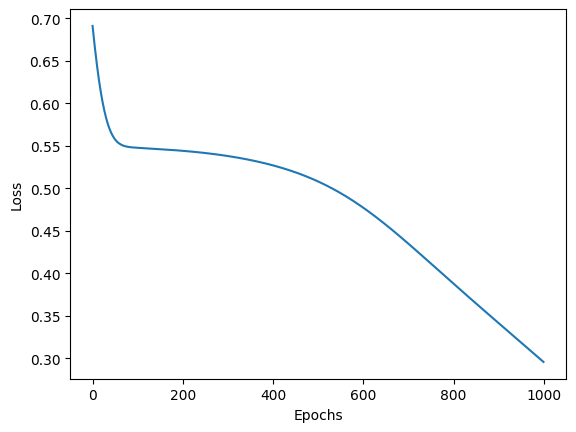

Training Losses are 
          0
0  0.731478
1  0.720349
2  0.709595
3  0.699224
4  0.689242
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 8
[[2994   50]
 [ 172  784]]
Accuracy: 0.9445, Precision: 0.9400, Recall: 0.8201, F1-score: 0.8760

Test Data
Confusion Matrix for hiden layer 8 and 64 and 8
[[2980   64]
 [ 170  786]]
Accuracy: 0.9415, Precision: 0.9247, Recall: 0.8222, F1-score: 0.8704



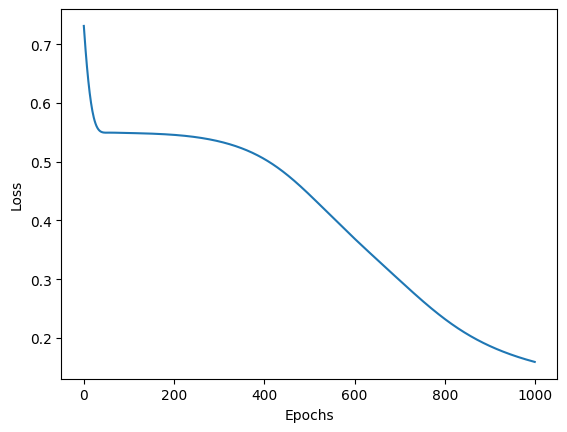

Training Losses are 
          0
0  0.813275
1  0.799726
2  0.786558
3  0.773778
4  0.761392
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 16
[[3005   39]
 [ 220  736]]
Accuracy: 0.9353, Precision: 0.9497, Recall: 0.7699, F1-score: 0.8504

Test Data
Confusion Matrix for hiden layer 8 and 64 and 16
[[2994   50]
 [ 224  732]]
Accuracy: 0.9315, Precision: 0.9361, Recall: 0.7657, F1-score: 0.8423



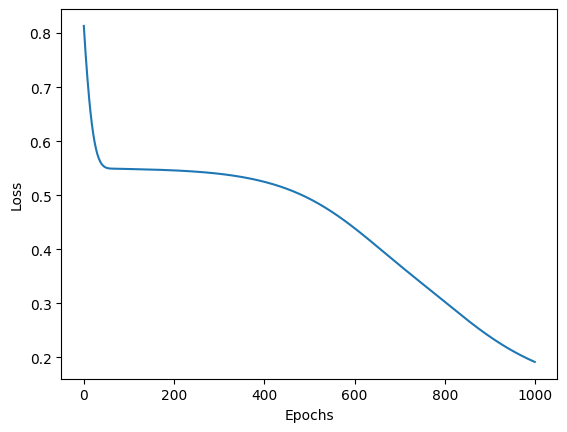

Training Losses are 
          0
0  0.825117
1  0.811906
2  0.799029
3  0.786493
4  0.774305
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 32
[[3003   41]
 [ 209  747]]
Accuracy: 0.9375, Precision: 0.9480, Recall: 0.7814, F1-score: 0.8567

Test Data
Confusion Matrix for hiden layer 8 and 64 and 32
[[2993   51]
 [ 220  736]]
Accuracy: 0.9323, Precision: 0.9352, Recall: 0.7699, F1-score: 0.8445



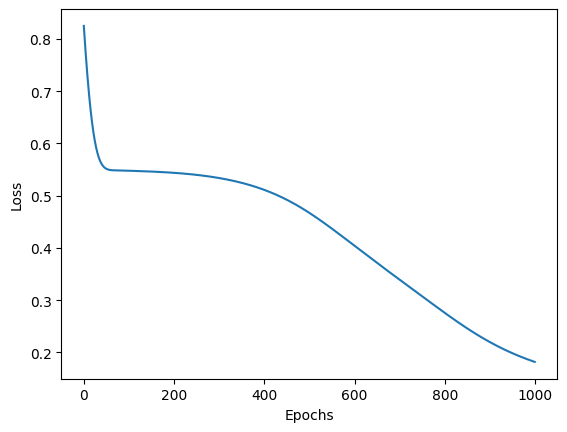

Training Losses are 
          0
0  0.679143
1  0.670028
2  0.661273
3  0.652883
4  0.644863
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 64
[[3004   40]
 [ 229  727]]
Accuracy: 0.9327, Precision: 0.9478, Recall: 0.7605, F1-score: 0.8439

Test Data
Confusion Matrix for hiden layer 8 and 64 and 64
[[2997   47]
 [ 240  716]]
Accuracy: 0.9283, Precision: 0.9384, Recall: 0.7490, F1-score: 0.8330



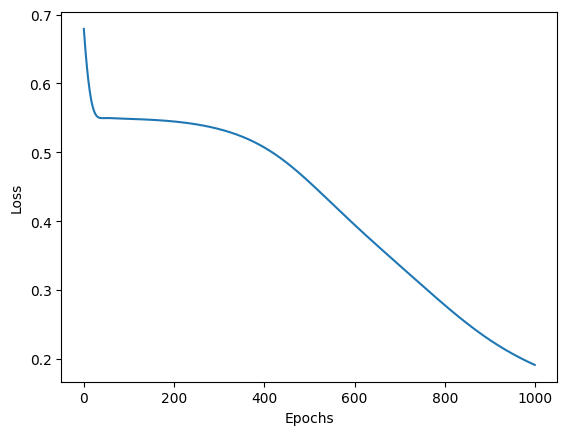

Training Losses are 
          0
0  0.802100
1  0.799419
2  0.796756
3  0.794111
4  0.791485
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


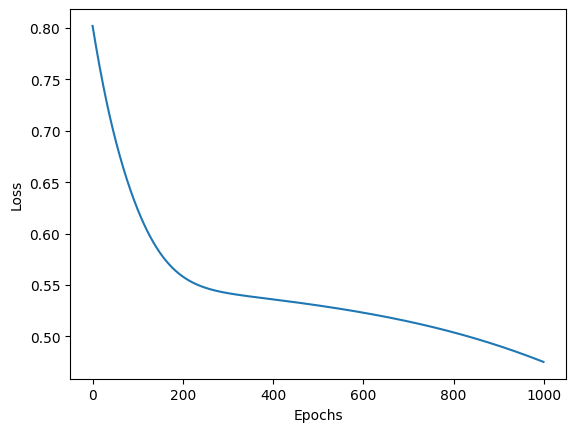

Training Losses are 
          0
0  0.713402
1  0.710876
2  0.708373
3  0.705893
4  0.703439
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 16
[[3031   13]
 [ 706  250]]
Accuracy: 0.8203, Precision: 0.9506, Recall: 0.2615, F1-score: 0.4102

Test Data
Confusion Matrix for hiden layer 16 and 8 and 16
[[3024   20]
 [ 707  249]]
Accuracy: 0.8183, Precision: 0.9257, Recall: 0.2605, F1-score: 0.4065



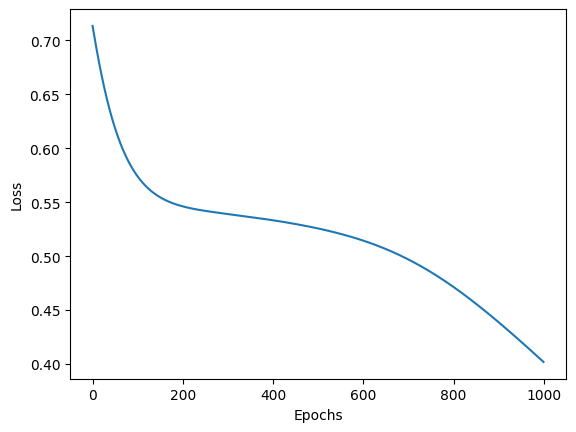

Training Losses are 
          0
0  0.576873
1  0.575914
2  0.574972
3  0.574047
4  0.573139
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 32
[[3021   23]
 [ 327  629]]
Accuracy: 0.9125, Precision: 0.9647, Recall: 0.6579, F1-score: 0.7823

Test Data
Confusion Matrix for hiden layer 16 and 8 and 32
[[3015   29]
 [ 318  638]]
Accuracy: 0.9133, Precision: 0.9565, Recall: 0.6674, F1-score: 0.7862



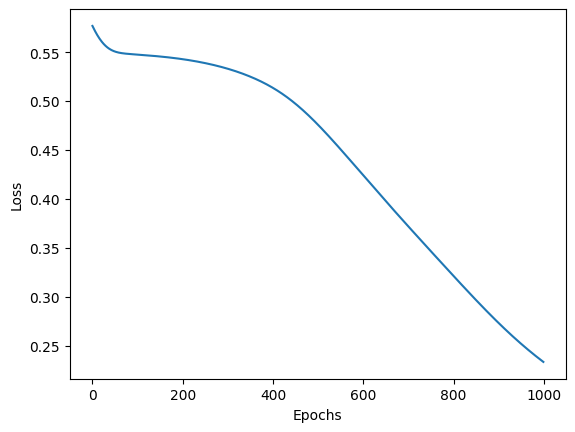

Training Losses are 
          0
0  0.702612
1  0.700332
2  0.698068
3  0.695821
4  0.693589
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 64
[[3027   17]
 [ 653  303]]
Accuracy: 0.8325, Precision: 0.9469, Recall: 0.3169, F1-score: 0.4749

Test Data
Confusion Matrix for hiden layer 16 and 8 and 64
[[3023   21]
 [ 665  291]]
Accuracy: 0.8285, Precision: 0.9327, Recall: 0.3044, F1-score: 0.4590



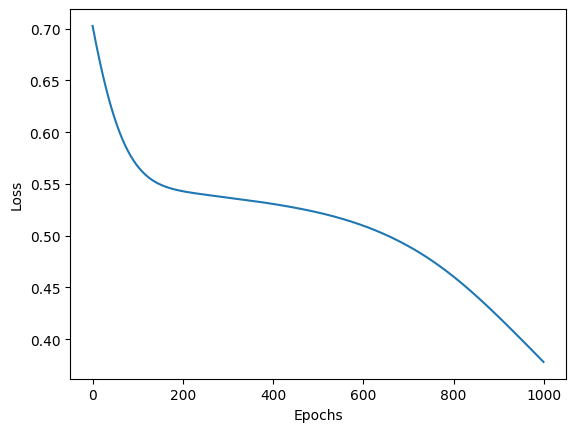

Training Losses are 
          0
0  0.844578
1  0.839147
2  0.833774
3  0.828460
4  0.823205
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 8
[[3023   21]
 [ 635  321]]
Accuracy: 0.8360, Precision: 0.9386, Recall: 0.3358, F1-score: 0.4946

Test Data
Confusion Matrix for hiden layer 16 and 16 and 8
[[3021   23]
 [ 655  301]]
Accuracy: 0.8305, Precision: 0.9290, Recall: 0.3149, F1-score: 0.4703



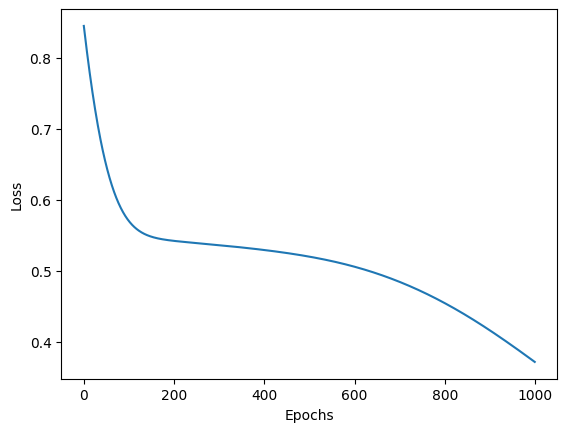

Training Losses are 
          0
0  0.736809
1  0.732737
2  0.728712
3  0.724736
4  0.720809
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 16
[[3004   40]
 [ 393  563]]
Accuracy: 0.8918, Precision: 0.9337, Recall: 0.5889, F1-score: 0.7223

Test Data
Confusion Matrix for hiden layer 16 and 16 and 16
[[3003   41]
 [ 374  582]]
Accuracy: 0.8962, Precision: 0.9342, Recall: 0.6088, F1-score: 0.7372



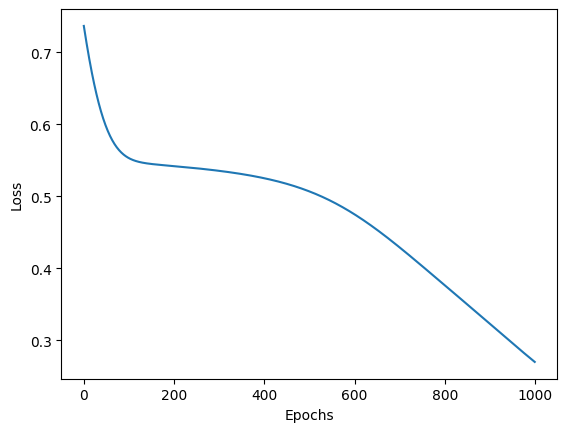

Training Losses are 
          0
0  0.764933
1  0.760455
2  0.756035
3  0.751675
4  0.747375
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 32
[[3033   11]
 [ 731  225]]
Accuracy: 0.8145, Precision: 0.9534, Recall: 0.2354, F1-score: 0.3775

Test Data
Confusion Matrix for hiden layer 16 and 16 and 32
[[3026   18]
 [ 733  223]]
Accuracy: 0.8123, Precision: 0.9253, Recall: 0.2333, F1-score: 0.3726



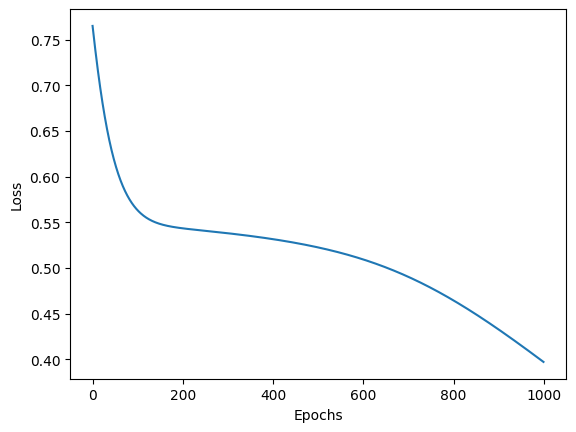

Training Losses are 
          0
0  0.727499
1  0.723546
2  0.719640
3  0.715782
4  0.711972
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 64
[[3009   35]
 [ 359  597]]
Accuracy: 0.9015, Precision: 0.9446, Recall: 0.6245, F1-score: 0.7519

Test Data
Confusion Matrix for hiden layer 16 and 16 and 64
[[3006   38]
 [ 343  613]]
Accuracy: 0.9048, Precision: 0.9416, Recall: 0.6412, F1-score: 0.7629



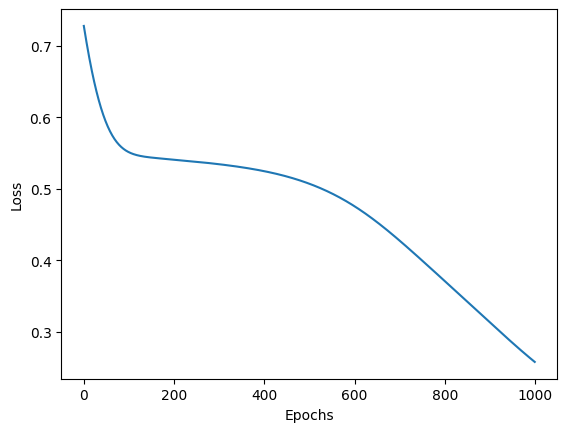

Training Losses are 
          0
0  0.644604
1  0.639872
2  0.635268
3  0.630795
4  0.626453
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 8
[[3008   36]
 [ 289  667]]
Accuracy: 0.9187, Precision: 0.9488, Recall: 0.6977, F1-score: 0.8041

Test Data
Confusion Matrix for hiden layer 16 and 32 and 8
[[3006   38]
 [ 298  658]]
Accuracy: 0.9160, Precision: 0.9454, Recall: 0.6883, F1-score: 0.7966



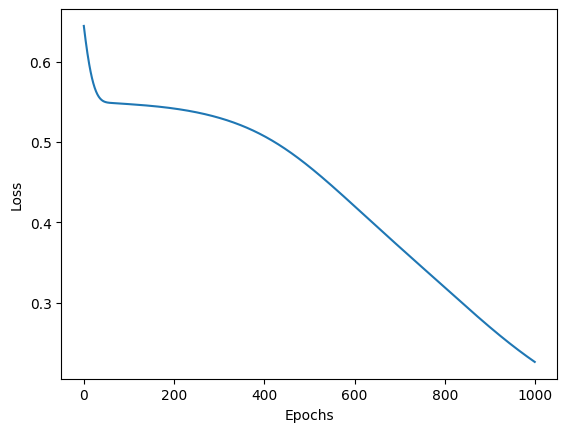

Training Losses are 
          0
0  0.697071
1  0.691129
2  0.685317
3  0.679636
4  0.674088
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 16
[[2995   49]
 [ 172  784]]
Accuracy: 0.9447, Precision: 0.9412, Recall: 0.8201, F1-score: 0.8765

Test Data
Confusion Matrix for hiden layer 16 and 32 and 16
[[2982   62]
 [ 168  788]]
Accuracy: 0.9425, Precision: 0.9271, Recall: 0.8243, F1-score: 0.8726



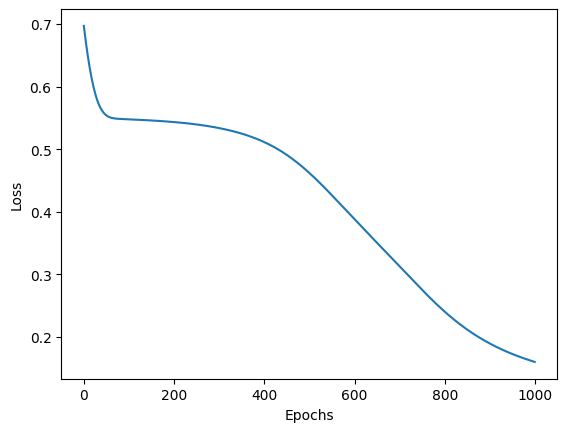

Training Losses are 
          0
0  0.580445
1  0.577911
2  0.575493
3  0.573194
4  0.571015
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 32
[[2978   66]
 [ 136  820]]
Accuracy: 0.9495, Precision: 0.9255, Recall: 0.8577, F1-score: 0.8903

Test Data
Confusion Matrix for hiden layer 16 and 32 and 32
[[2959   85]
 [ 128  828]]
Accuracy: 0.9467, Precision: 0.9069, Recall: 0.8661, F1-score: 0.8860



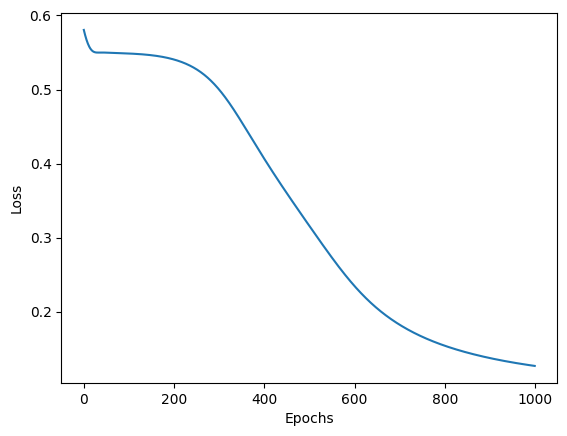

Training Losses are 
          0
0  0.661234
1  0.655790
2  0.650488
3  0.645330
4  0.640317
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 64
[[3003   41]
 [ 191  765]]
Accuracy: 0.9420, Precision: 0.9491, Recall: 0.8002, F1-score: 0.8683

Test Data
Confusion Matrix for hiden layer 16 and 32 and 64
[[2988   56]
 [ 198  758]]
Accuracy: 0.9365, Precision: 0.9312, Recall: 0.7929, F1-score: 0.8565



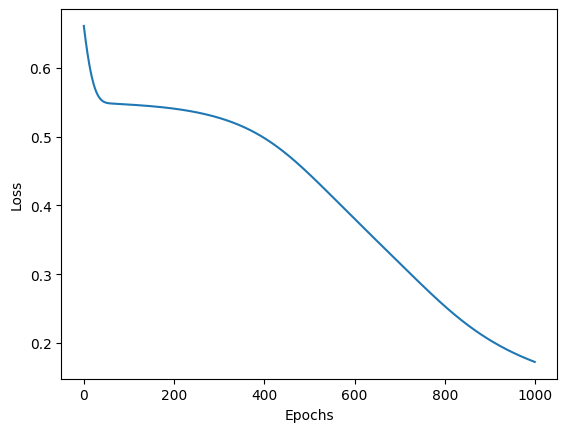

Training Losses are 
          0
0  0.762286
1  0.748765
2  0.735720
3  0.723158
4  0.711087
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 8
[[2984   60]
 [ 156  800]]
Accuracy: 0.9460, Precision: 0.9302, Recall: 0.8368, F1-score: 0.8811

Test Data
Confusion Matrix for hiden layer 16 and 64 and 8
[[2971   73]
 [ 149  807]]
Accuracy: 0.9445, Precision: 0.9170, Recall: 0.8441, F1-score: 0.8791



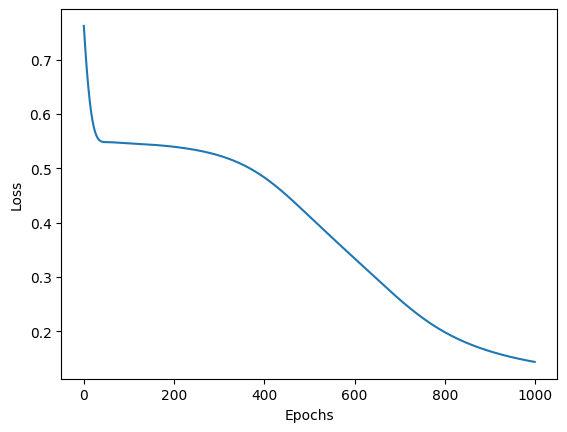

Training Losses are 
          0
0  0.786407
1  0.772090
2  0.758253
3  0.744903
4  0.732046
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 16
[[3005   39]
 [ 218  738]]
Accuracy: 0.9357, Precision: 0.9498, Recall: 0.7720, F1-score: 0.8517

Test Data
Confusion Matrix for hiden layer 16 and 64 and 16
[[2996   48]
 [ 223  733]]
Accuracy: 0.9323, Precision: 0.9385, Recall: 0.7667, F1-score: 0.8440



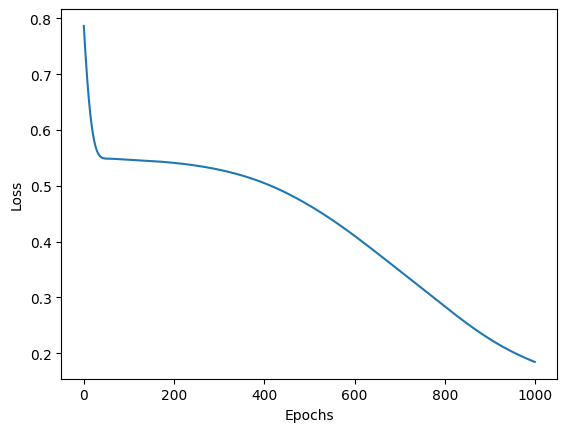

Training Losses are 
          0
0  0.728570
1  0.716440
2  0.704765
3  0.693554
4  0.682813
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 32
[[2990   54]
 [ 160  796]]
Accuracy: 0.9465, Precision: 0.9365, Recall: 0.8326, F1-score: 0.8815

Test Data
Confusion Matrix for hiden layer 16 and 64 and 32
[[2975   69]
 [ 144  812]]
Accuracy: 0.9467, Precision: 0.9217, Recall: 0.8494, F1-score: 0.8841



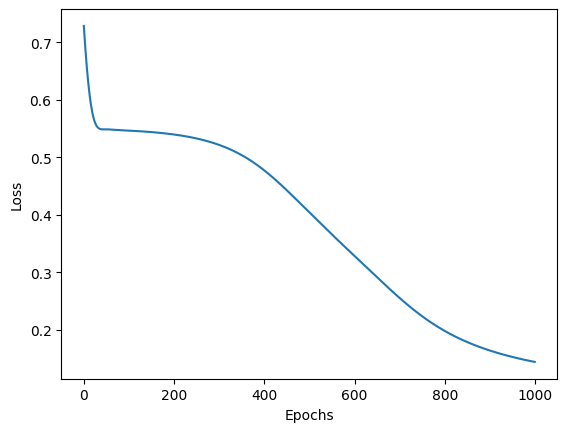

Training Losses are 
          0
0  0.705425
1  0.694601
2  0.684194
3  0.674211
4  0.664657
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 64
[[2988   56]
 [ 152  804]]
Accuracy: 0.9480, Precision: 0.9349, Recall: 0.8410, F1-score: 0.8855

Test Data
Confusion Matrix for hiden layer 16 and 64 and 64
[[2974   70]
 [ 143  813]]
Accuracy: 0.9467, Precision: 0.9207, Recall: 0.8504, F1-score: 0.8842



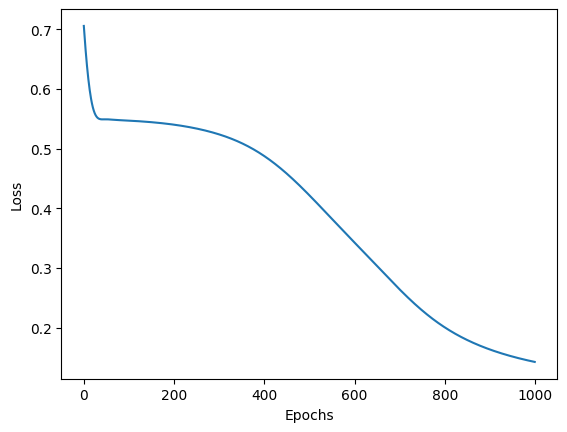

Training Losses are 
          0
0  0.705652
1  0.703278
2  0.700914
3  0.698563
4  0.696222
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 8
[[3037    7]
 [ 672  284]]
Accuracy: 0.8303, Precision: 0.9759, Recall: 0.2971, F1-score: 0.4555

Test Data
Confusion Matrix for hiden layer 32 and 8 and 8
[[3036    8]
 [ 680  276]]
Accuracy: 0.8280, Precision: 0.9718, Recall: 0.2887, F1-score: 0.4452



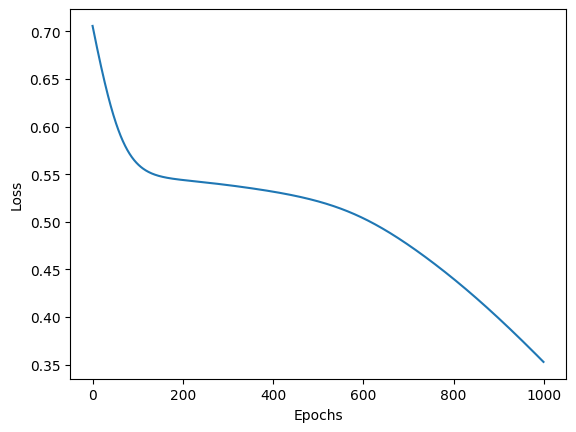

Training Losses are 
          0
0  0.773503
1  0.770550
2  0.767616
3  0.764702
4  0.761807
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 16
[[3027   17]
 [ 432  524]]
Accuracy: 0.8878, Precision: 0.9686, Recall: 0.5481, F1-score: 0.7001

Test Data
Confusion Matrix for hiden layer 32 and 8 and 16
[[3022   22]
 [ 410  546]]
Accuracy: 0.8920, Precision: 0.9613, Recall: 0.5711, F1-score: 0.7165



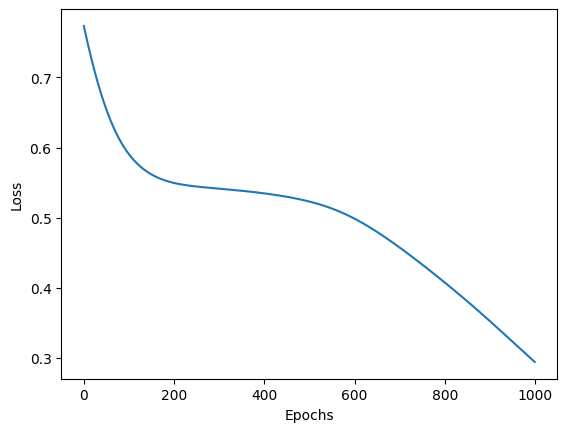

Training Losses are 
          0
0  0.839419
1  0.835264
2  0.831151
3  0.827080
4  0.823053
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 32
[[3044    0]
 [ 954    2]]
Accuracy: 0.7615, Precision: 1.0000, Recall: 0.0021, F1-score: 0.0042

Test Data
Confusion Matrix for hiden layer 32 and 8 and 32
[[3044    0]
 [ 952    4]]
Accuracy: 0.7620, Precision: 1.0000, Recall: 0.0042, F1-score: 0.0083



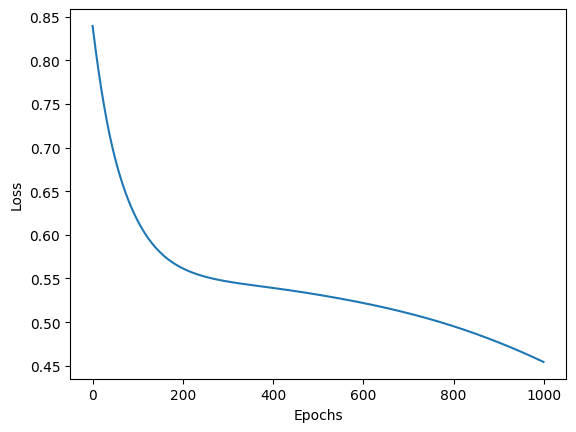

Training Losses are 
          0
0  0.869678
1  0.865066
2  0.860503
3  0.855992
4  0.851530
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 64
[[3041    3]
 [ 828  128]]
Accuracy: 0.7923, Precision: 0.9771, Recall: 0.1339, F1-score: 0.2355

Test Data
Confusion Matrix for hiden layer 32 and 8 and 64
[[3042    2]
 [ 815  141]]
Accuracy: 0.7957, Precision: 0.9860, Recall: 0.1475, F1-score: 0.2566



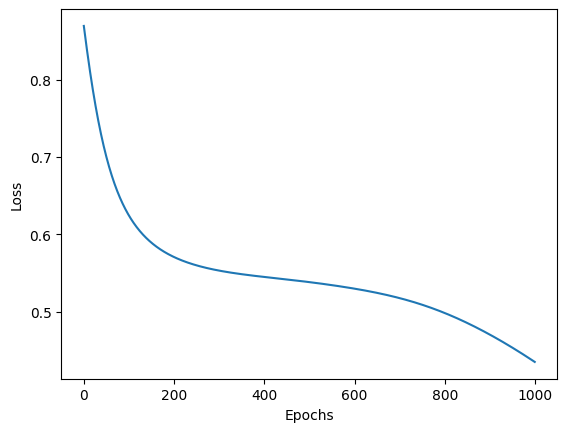

Training Losses are 
          0
0  0.759989
1  0.755052
2  0.750188
3  0.745397
4  0.740680
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 8
[[2999   45]
 [ 359  597]]
Accuracy: 0.8990, Precision: 0.9299, Recall: 0.6245, F1-score: 0.7472

Test Data
Confusion Matrix for hiden layer 32 and 16 and 8
[[3003   41]
 [ 336  620]]
Accuracy: 0.9058, Precision: 0.9380, Recall: 0.6485, F1-score: 0.7669



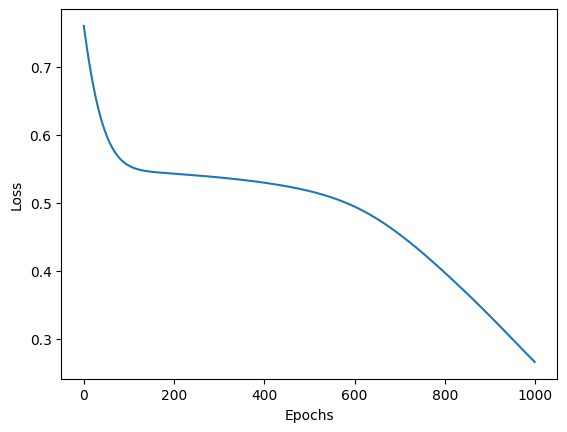

Training Losses are 
          0
0  0.582884
1  0.580754
2  0.578697
3  0.576712
4  0.574800
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 16
[[2975   69]
 [ 133  823]]
Accuracy: 0.9495, Precision: 0.9226, Recall: 0.8609, F1-score: 0.8907

Test Data
Confusion Matrix for hiden layer 32 and 16 and 16
[[2958   86]
 [ 121  835]]
Accuracy: 0.9483, Precision: 0.9066, Recall: 0.8734, F1-score: 0.8897



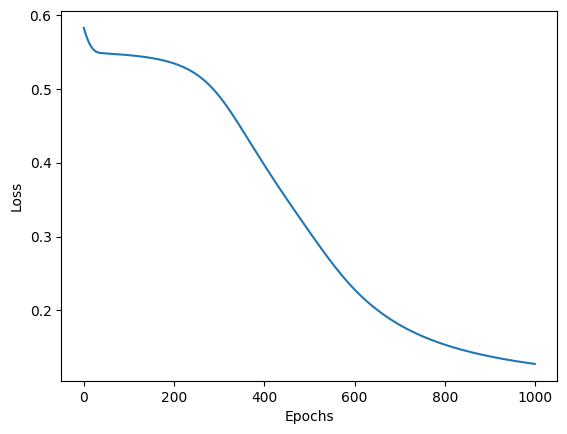

Training Losses are 
          0
0  0.792900
1  0.786916
2  0.781009
3  0.775180
4  0.769430
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 32
[[2998   46]
 [ 343  613]]
Accuracy: 0.9028, Precision: 0.9302, Recall: 0.6412, F1-score: 0.7591

Test Data
Confusion Matrix for hiden layer 32 and 16 and 32
[[3001   43]
 [ 326  630]]
Accuracy: 0.9077, Precision: 0.9361, Recall: 0.6590, F1-score: 0.7735



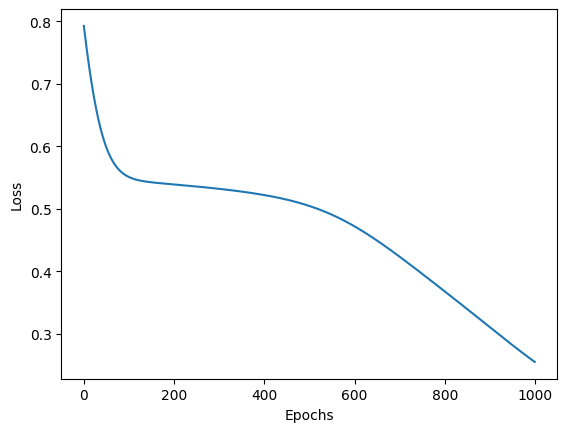

Training Losses are 
          0
0  0.742475
1  0.737124
2  0.731837
3  0.726615
4  0.721460
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 64
[[3012   32]
 [ 278  678]]
Accuracy: 0.9225, Precision: 0.9549, Recall: 0.7092, F1-score: 0.8139

Test Data
Confusion Matrix for hiden layer 32 and 16 and 64
[[3008   36]
 [ 290  666]]
Accuracy: 0.9185, Precision: 0.9487, Recall: 0.6967, F1-score: 0.8034



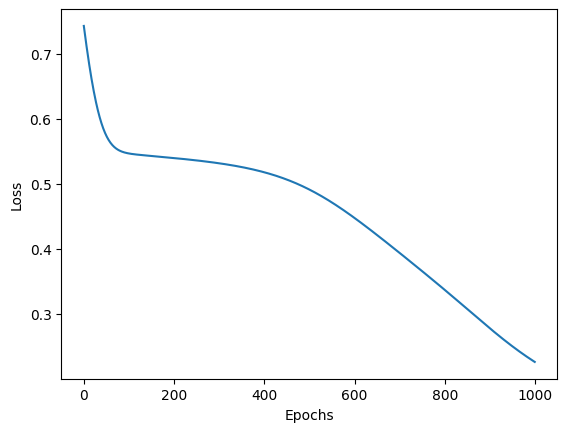

Training Losses are 
          0
0  0.694976
1  0.687563
2  0.680346
3  0.673330
4  0.666518
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 8
[[2991   53]
 [ 164  792]]
Accuracy: 0.9457, Precision: 0.9373, Recall: 0.8285, F1-score: 0.8795

Test Data
Confusion Matrix for hiden layer 32 and 32 and 8
[[2974   70]
 [ 154  802]]
Accuracy: 0.9440, Precision: 0.9197, Recall: 0.8389, F1-score: 0.8775



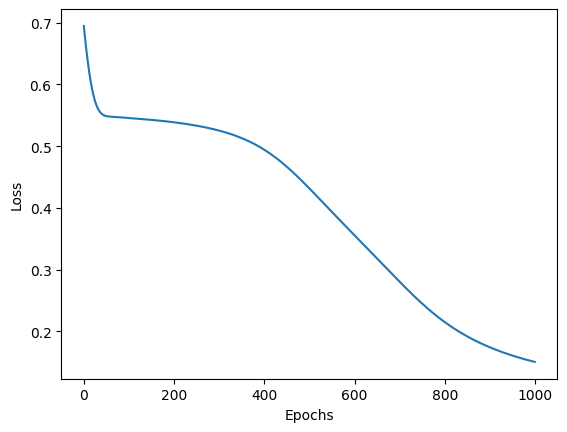

Training Losses are 
          0
0  0.598910
1  0.594966
2  0.591200
3  0.587613
4  0.584207
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 16
[[2967   77]
 [ 126  830]]
Accuracy: 0.9493, Precision: 0.9151, Recall: 0.8682, F1-score: 0.8910

Test Data
Confusion Matrix for hiden layer 32 and 32 and 16
[[2958   86]
 [ 110  846]]
Accuracy: 0.9510, Precision: 0.9077, Recall: 0.8849, F1-score: 0.8962



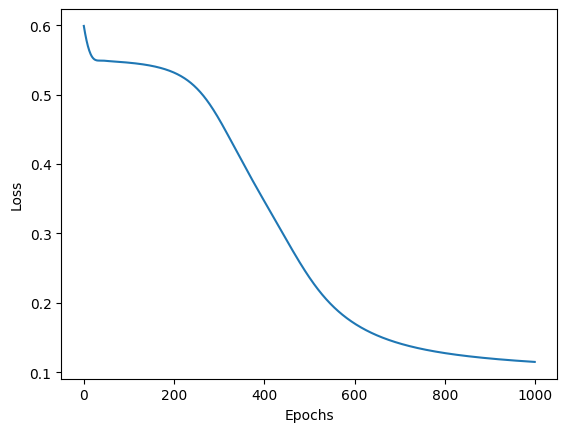

Training Losses are 
          0
0  0.649461
1  0.643203
2  0.637162
3  0.631341
4  0.625744
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 32
[[2977   67]
 [ 140  816]]
Accuracy: 0.9483, Precision: 0.9241, Recall: 0.8536, F1-score: 0.8874

Test Data
Confusion Matrix for hiden layer 32 and 32 and 32
[[2964   80]
 [ 123  833]]
Accuracy: 0.9493, Precision: 0.9124, Recall: 0.8713, F1-score: 0.8914



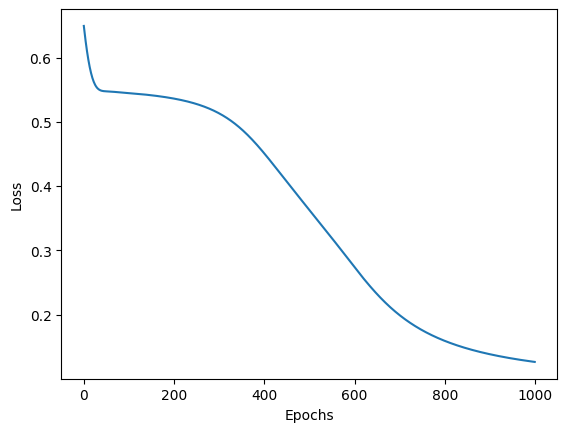

Training Losses are 
          0
0  0.567092
1  0.564718
2  0.562527
3  0.560523
4  0.558704
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 64
[[2965   79]
 [ 122  834]]
Accuracy: 0.9497, Precision: 0.9135, Recall: 0.8724, F1-score: 0.8925

Test Data
Confusion Matrix for hiden layer 32 and 32 and 64
[[2957   87]
 [ 106  850]]
Accuracy: 0.9517, Precision: 0.9072, Recall: 0.8891, F1-score: 0.8980



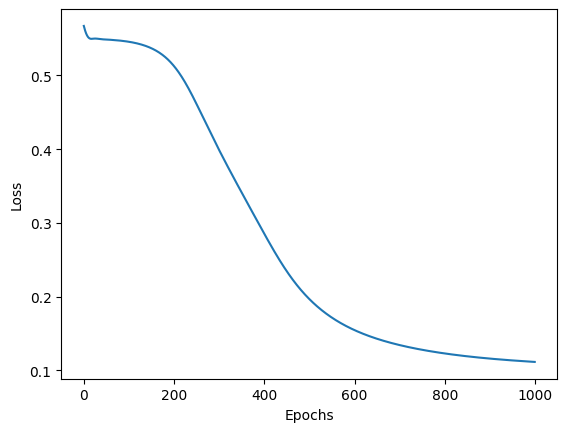

Training Losses are 
          0
0  0.706935
1  0.693427
2  0.680583
3  0.668412
4  0.656921
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 8
[[2977   67]
 [ 137  819]]
Accuracy: 0.9490, Precision: 0.9244, Recall: 0.8567, F1-score: 0.8893

Test Data
Confusion Matrix for hiden layer 32 and 64 and 8
[[2963   81]
 [ 126  830]]
Accuracy: 0.9483, Precision: 0.9111, Recall: 0.8682, F1-score: 0.8891



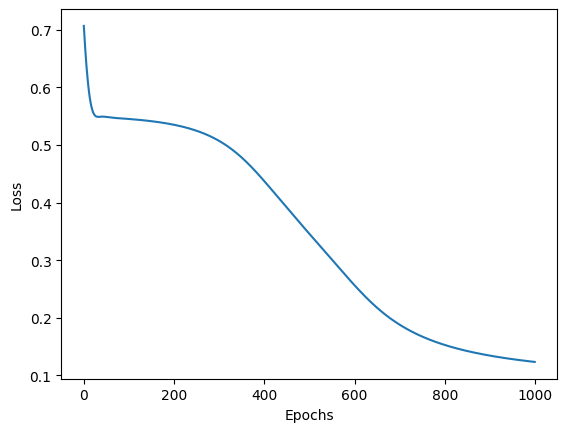

Training Losses are 
          0
0  0.610660
1  0.602833
2  0.595583
3  0.588915
4  0.582829
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 16
[[2965   79]
 [ 127  829]]
Accuracy: 0.9485, Precision: 0.9130, Recall: 0.8672, F1-score: 0.8895

Test Data
Confusion Matrix for hiden layer 32 and 64 and 16
[[2958   86]
 [ 108  848]]
Accuracy: 0.9515, Precision: 0.9079, Recall: 0.8870, F1-score: 0.8974



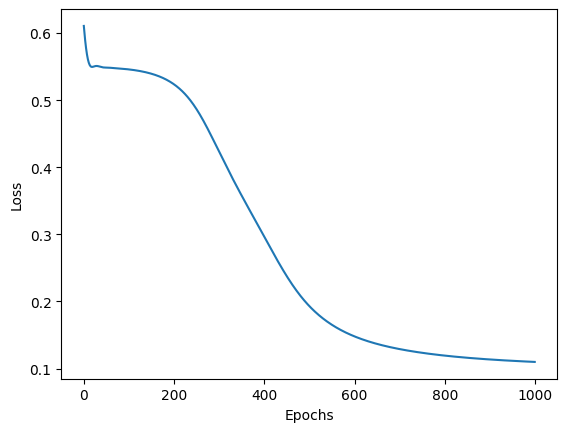

Training Losses are 
          0
0  0.567809
1  0.563804
2  0.560339
3  0.557410
4  0.555010
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 32
[[2962   82]
 [ 116  840]]
Accuracy: 0.9505, Precision: 0.9111, Recall: 0.8787, F1-score: 0.8946

Test Data
Confusion Matrix for hiden layer 32 and 64 and 32
[[2952   92]
 [  99  857]]
Accuracy: 0.9523, Precision: 0.9031, Recall: 0.8964, F1-score: 0.8997



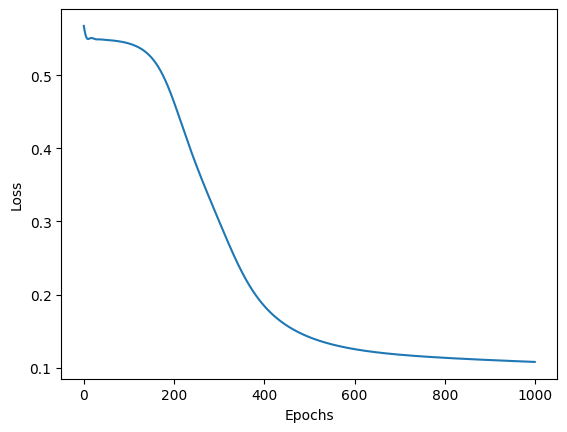

Training Losses are 
          0
0  0.847636
1  0.828624
2  0.810279
3  0.792616
4  0.775644
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 64
[[3003   41]
 [ 187  769]]
Accuracy: 0.9430, Precision: 0.9494, Recall: 0.8044, F1-score: 0.8709

Test Data
Confusion Matrix for hiden layer 32 and 64 and 64
[[2987   57]
 [ 198  758]]
Accuracy: 0.9363, Precision: 0.9301, Recall: 0.7929, F1-score: 0.8560



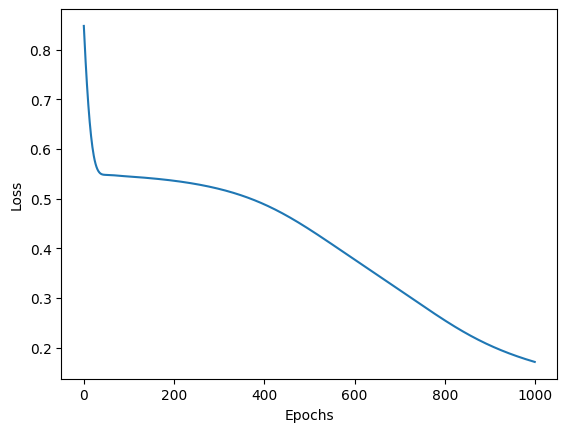

Training Losses are 
          0
0  0.658963
1  0.655656
2  0.652387
3  0.649158
4  0.645973
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 8
[[3009   35]
 [ 188  768]]
Accuracy: 0.9443, Precision: 0.9564, Recall: 0.8033, F1-score: 0.8732

Test Data
Confusion Matrix for hiden layer 64 and 8 and 8
[[2998   46]
 [ 199  757]]
Accuracy: 0.9387, Precision: 0.9427, Recall: 0.7918, F1-score: 0.8607



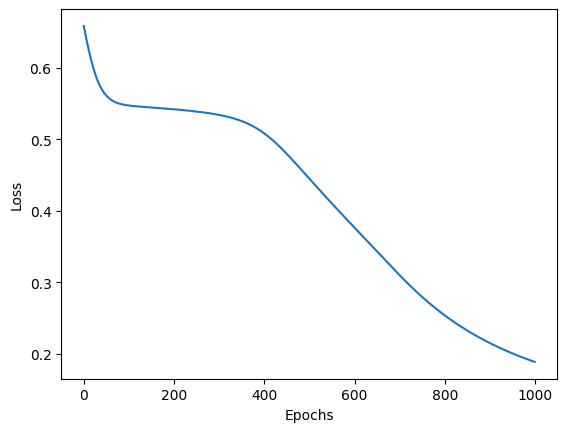

Training Losses are 
          0
0  0.638744
1  0.635322
2  0.631976
3  0.628708
4  0.625521
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 16
[[2982   62]
 [ 149  807]]
Accuracy: 0.9473, Precision: 0.9287, Recall: 0.8441, F1-score: 0.8844

Test Data
Confusion Matrix for hiden layer 64 and 8 and 16
[[2965   79]
 [ 133  823]]
Accuracy: 0.9470, Precision: 0.9124, Recall: 0.8609, F1-score: 0.8859



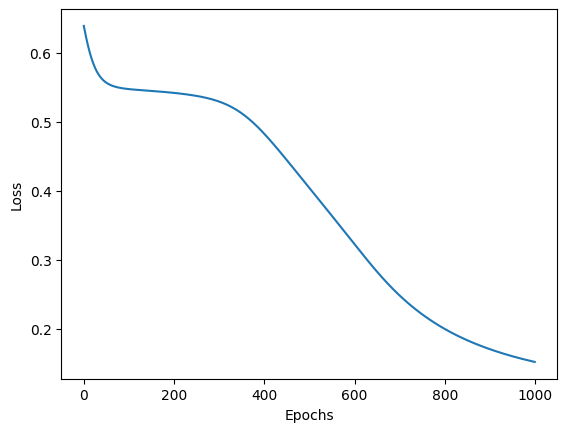

Training Losses are 
          0
0  0.676352
1  0.672709
2  0.669119
3  0.665585
4  0.662108
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 32
[[2995   49]
 [ 173  783]]
Accuracy: 0.9445, Precision: 0.9411, Recall: 0.8190, F1-score: 0.8758

Test Data
Confusion Matrix for hiden layer 64 and 8 and 32
[[2988   56]
 [ 168  788]]
Accuracy: 0.9440, Precision: 0.9336, Recall: 0.8243, F1-score: 0.8756



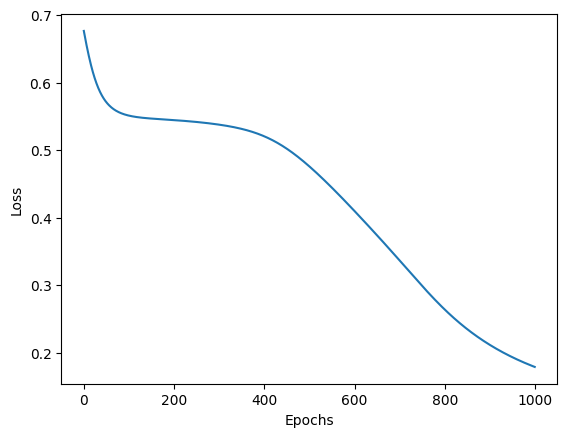

Training Losses are 
          0
0  0.618536
1  0.615413
2  0.612362
3  0.609385
4  0.606485
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 64
[[2975   69]
 [ 142  814]]
Accuracy: 0.9473, Precision: 0.9219, Recall: 0.8515, F1-score: 0.8853

Test Data
Confusion Matrix for hiden layer 64 and 8 and 64
[[2961   83]
 [ 126  830]]
Accuracy: 0.9477, Precision: 0.9091, Recall: 0.8682, F1-score: 0.8882



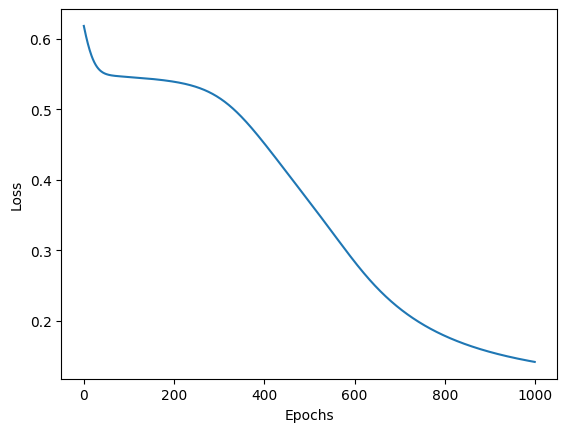

Training Losses are 
          0
0  0.613286
1  0.608829
2  0.604527
3  0.600387
4  0.596414
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 8
[[2968   76]
 [ 122  834]]
Accuracy: 0.9505, Precision: 0.9165, Recall: 0.8724, F1-score: 0.8939

Test Data
Confusion Matrix for hiden layer 64 and 16 and 8
[[2959   85]
 [ 109  847]]
Accuracy: 0.9515, Precision: 0.9088, Recall: 0.8860, F1-score: 0.8972



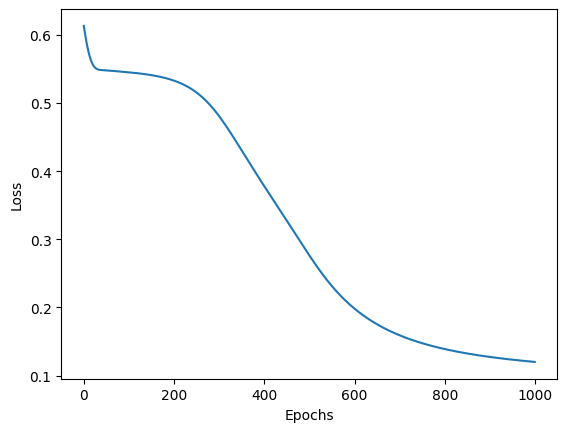

Training Losses are 
          0
0  0.783595
1  0.775008
2  0.766590
3  0.758348
4  0.750286
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 16
[[2995   49]
 [ 171  785]]
Accuracy: 0.9450, Precision: 0.9412, Recall: 0.8211, F1-score: 0.8771

Test Data
Confusion Matrix for hiden layer 64 and 16 and 16
[[2985   59]
 [ 169  787]]
Accuracy: 0.9430, Precision: 0.9303, Recall: 0.8232, F1-score: 0.8735



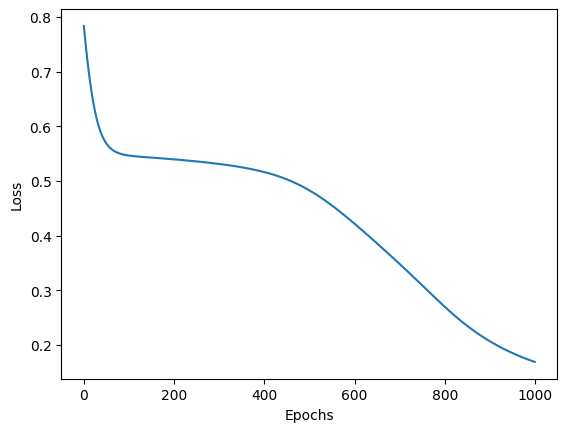

Training Losses are 
          0
0  0.688631
1  0.681405
2  0.674400
3  0.667616
4  0.661057
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 32
[[2982   62]
 [ 145  811]]
Accuracy: 0.9483, Precision: 0.9290, Recall: 0.8483, F1-score: 0.8868

Test Data
Confusion Matrix for hiden layer 64 and 16 and 32
[[2965   79]
 [ 129  827]]
Accuracy: 0.9480, Precision: 0.9128, Recall: 0.8651, F1-score: 0.8883



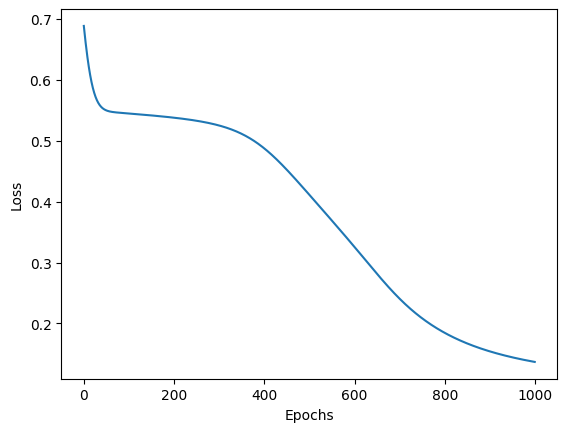

Training Losses are 
          0
0  0.794570
1  0.785608
2  0.776817
3  0.768203
4  0.759773
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 64
[[2995   49]
 [ 169  787]]
Accuracy: 0.9455, Precision: 0.9414, Recall: 0.8232, F1-score: 0.8783

Test Data
Confusion Matrix for hiden layer 64 and 16 and 64
[[2985   59]
 [ 163  793]]
Accuracy: 0.9445, Precision: 0.9308, Recall: 0.8295, F1-score: 0.8772



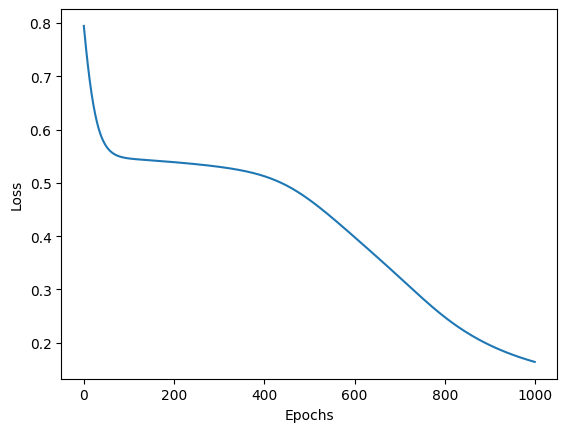

Training Losses are 
          0
0  0.618259
1  0.611360
2  0.604848
3  0.598729
4  0.593007
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 8
[[2965   79]
 [ 119  837]]
Accuracy: 0.9505, Precision: 0.9138, Recall: 0.8755, F1-score: 0.8942

Test Data
Confusion Matrix for hiden layer 64 and 32 and 8
[[2958   86]
 [ 105  851]]
Accuracy: 0.9523, Precision: 0.9082, Recall: 0.8902, F1-score: 0.8991



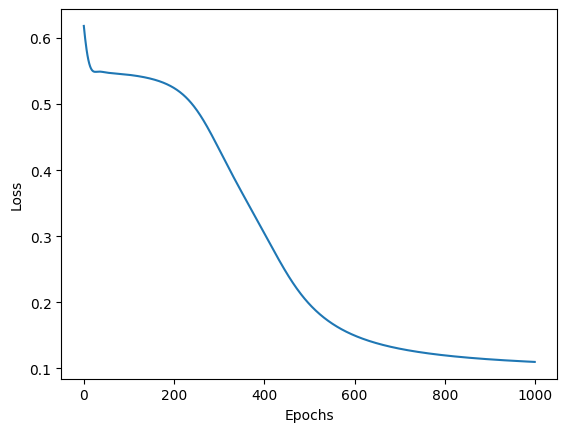

Training Losses are 
          0
0  0.627987
1  0.619908
2  0.612310
3  0.605197
4  0.598569
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 16
[[2964   80]
 [ 124  832]]
Accuracy: 0.9490, Precision: 0.9123, Recall: 0.8703, F1-score: 0.8908

Test Data
Confusion Matrix for hiden layer 64 and 32 and 16
[[2958   86]
 [ 107  849]]
Accuracy: 0.9517, Precision: 0.9080, Recall: 0.8881, F1-score: 0.8979



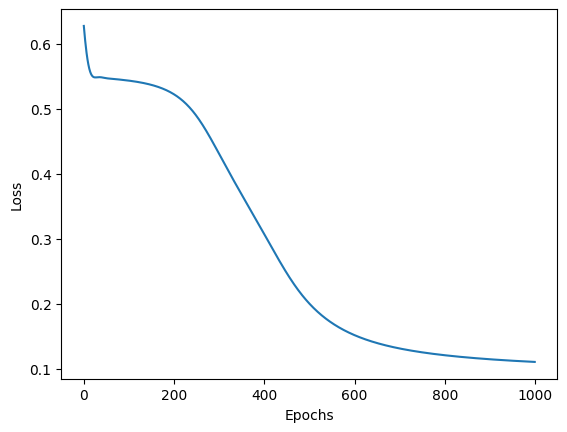

Training Losses are 
          0
0  0.670672
1  0.662006
2  0.653711
3  0.645790
4  0.638246
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 32
[[2967   77]
 [ 122  834]]
Accuracy: 0.9503, Precision: 0.9155, Recall: 0.8724, F1-score: 0.8934

Test Data
Confusion Matrix for hiden layer 64 and 32 and 32
[[2962   82]
 [ 108  848]]
Accuracy: 0.9525, Precision: 0.9118, Recall: 0.8870, F1-score: 0.8993



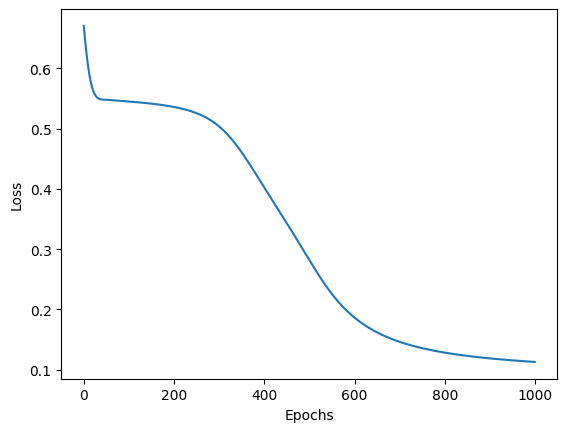

Training Losses are 
          0
0  0.654843
1  0.646912
2  0.639305
3  0.632031
4  0.625094
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 64
[[2967   77]
 [ 118  838]]
Accuracy: 0.9513, Precision: 0.9158, Recall: 0.8766, F1-score: 0.8958

Test Data
Confusion Matrix for hiden layer 64 and 32 and 64
[[2956   88]
 [ 105  851]]
Accuracy: 0.9517, Precision: 0.9063, Recall: 0.8902, F1-score: 0.8982



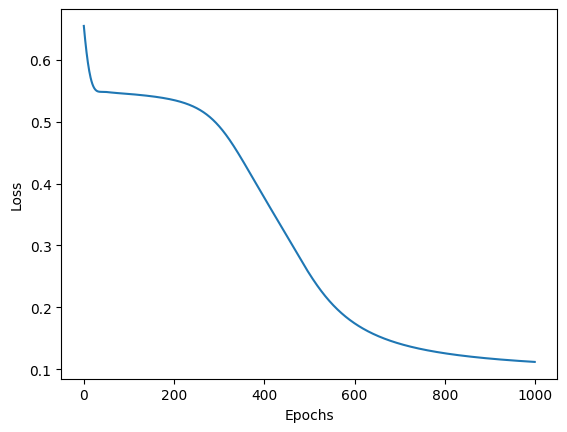

Training Losses are 
          0
0  0.811600
1  0.790192
2  0.769827
3  0.750519
4  0.732276
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 8
[[2968   76]
 [ 124  832]]
Accuracy: 0.9500, Precision: 0.9163, Recall: 0.8703, F1-score: 0.8927

Test Data
Confusion Matrix for hiden layer 64 and 64 and 8
[[2960   84]
 [ 108  848]]
Accuracy: 0.9520, Precision: 0.9099, Recall: 0.8870, F1-score: 0.8983



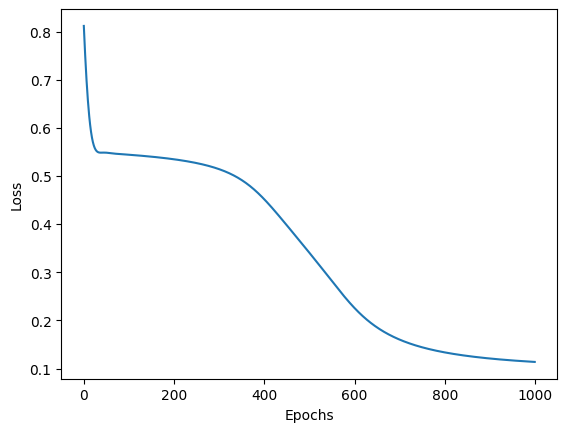

Training Losses are 
          0
0  0.794582
1  0.772588
2  0.751738
3  0.732052
4  0.713541
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 16
[[2968   76]
 [ 124  832]]
Accuracy: 0.9500, Precision: 0.9163, Recall: 0.8703, F1-score: 0.8927

Test Data
Confusion Matrix for hiden layer 64 and 64 and 16
[[2960   84]
 [ 108  848]]
Accuracy: 0.9520, Precision: 0.9099, Recall: 0.8870, F1-score: 0.8983



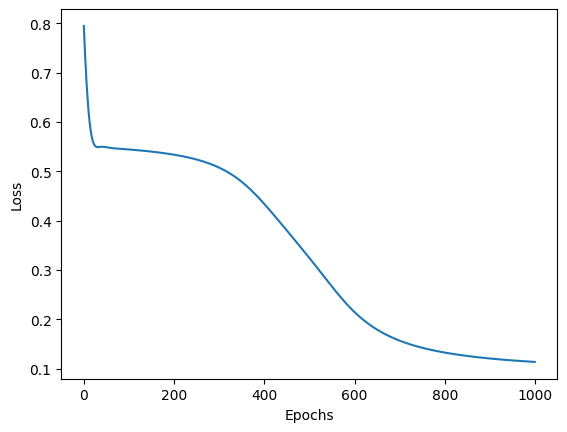

Training Losses are 
          0
0  0.570819
1  0.565232
2  0.560542
3  0.556747
4  0.553824
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 32
[[2959   85]
 [ 117  839]]
Accuracy: 0.9495, Precision: 0.9080, Recall: 0.8776, F1-score: 0.8926

Test Data
Confusion Matrix for hiden layer 64 and 64 and 32
[[2955   89]
 [  97  859]]
Accuracy: 0.9535, Precision: 0.9061, Recall: 0.8985, F1-score: 0.9023



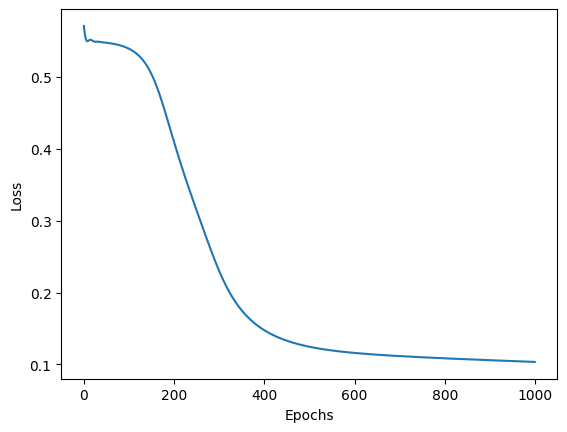

Training Losses are 
          0
0  0.597724
1  0.588756
2  0.580791
3  0.573829
4  0.567857
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 64
[[2968   76]
 [ 114  842]]
Accuracy: 0.9525, Precision: 0.9172, Recall: 0.8808, F1-score: 0.8986

Test Data
Confusion Matrix for hiden layer 64 and 64 and 64
[[2959   85]
 [  95  861]]
Accuracy: 0.9550, Precision: 0.9101, Recall: 0.9006, F1-score: 0.9054



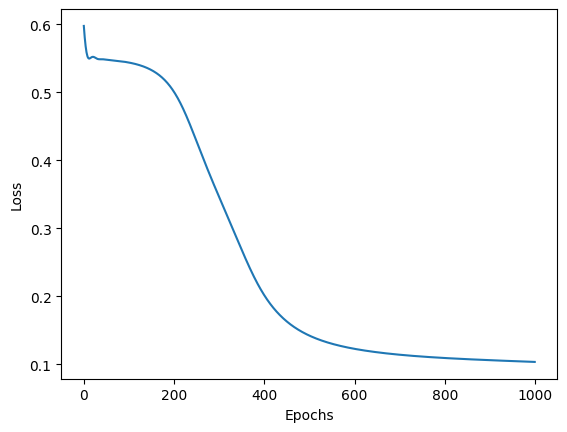

The best accuracy on test data is 0.955 for layers 64 , 64, 64


In [17]:
nuerons = [8,16,32,64]
best_score=0
layer1=0
layer2=0
layer3=0
for nueron in nuerons:
  for double_nueron in nuerons:
    for triple_nueron in nuerons:
      model = DoubleLayer(25,nueron,double_nueron)
      criterion = nn.BCELoss() #Binary Classifiaction Loss
      optimizer = optim.Adam(model.parameters(), lr=0.001)
      epochs=1000
      loss_arr=[]
      for i in range(epochs):
            optimizer.zero_grad()
            model.train()
            outputs=model(X_train)
            outputs = outputs.view(-1, 1)
            loss = criterion(outputs, y_train.float())
            loss_arr.append(loss.detach().numpy())
            loss.backward()
            optimizer.step()
      print("Training Losses are ")
      loss_df = pd.DataFrame(loss_arr)
      print(loss_df.head())
      y_val_pred=model(X_val)
      y_val_pred=(y_val_pred>0.5).float()
      cm = confusion_matrix(y_val, y_val_pred)
      acc = accuracy_score(y_val, y_val_pred)
      precision = precision_score(y_val.numpy(), y_val_pred.numpy())
      recall = recall_score(y_val.numpy(), y_val_pred.numpy())
      f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
      print("Validation Data")
      print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      y_test_pred=model(X_test)
      y_test_pred=(y_test_pred>0.5).float()
      cm = confusion_matrix(y_test, y_test_pred)
      acc = accuracy_score(y_test, y_test_pred)
      if acc > best_score:
          best_score=acc
          layer1=nueron
          layer2=double_nueron
          layer3=triple_nueron
      precision = precision_score(y_test.numpy(), y_test_pred.numpy())
      recall = recall_score(y_test.numpy(), y_test_pred.numpy())
      f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
      print("Test Data")
      print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      plt.plot(range(epochs), loss_arr)
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.show()
print(f"The best accuracy on test data is {best_score} for layers {layer1} , {layer2}, {layer3}")